# Research Goal: Statistical Investigation into Bankruptcy data from the Taiwan Economic Journal for the years 1999–2009.

In [ ]:
!pip install pycaret

In [ ]:
!pip install dataprep
!pip install imblearn

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from scipy import stats
from scipy.stats import norm
import statistics
import statsmodels.api as sm
import pylab as py

import plotly.express as px

pd.set_option('display.float_format', lambda x: '%.3f' % x)


# import dataprep.eda as eda # EDA, Cleaning
from dataprep.eda import create_report

# Data analysis and ML Library
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Lasso # Lasso regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Logistic regression
from sklearn.svm import SVC # Support vector machine classifier
from sklearn.tree import DecisionTreeClassifier # Decision tree classifier
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn.neighbors import KNeighborsClassifier# K Nearset Neighbors
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score,log_loss,roc_curve,classification_report, confusion_matrix

# Handle Imbalanced dataset
from imblearn.over_sampling import SMOTE

# Print html elements
from IPython.display import Markdown

In [ ]:
df = pd.read_csv("/content/data.csv")
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                              0.371          
1          1                                              0.464          
2          1                                              0.426          
3          1                                              0.400          
4          1                                              0.465          

    ROA(A) before interest and % after tax  \
0                                    0.424   
1                                    0.538   
2                                    0.499   
3                                    0.451   
4                                    0.538   

    ROA(B) before interest and depreciation after tax  \
0                                              0.406    
1                                              0.517    
2                                              0.472    
3                                              0.458    
4                                              0.522    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601                         0.601   
1                    0.610                         0.610   
2                    0.601                         0.601   
3                    0.584                         0.584   
4                    0.599                         0.599   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.999                       0.797   
1                   0.999                       0.797   
2                   0.999                       0.796   
3                   0.999                       0.797   
4                   0.999                       0.797   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                         0.809                                         0.303   
1                         0.809                                         0.304   
2                         0.808                                         0.302   
3                         0.809                                         0.303   
4                         0.809                                         0.303   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                        0.717                       0.009   
1  ...                        0.795                       0.008   
2  ...                        0.775                       0.040   
3  ...                        0.740                       0.003   
4  ...                        0.795                       0.004   

    No-credit Interval   Gross Profit to Sales  \
0                0.623                   0.601   
1                0.624                   0.610   
2                0.624                   0.601   
3                0.623                   0.584   
4                0.624                   0.599   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                                0.828                 0.290   
1                                0.840                 0.284   
2                                0.837                 0.290   
3                                0.835                 0.282   
4                                0.840                 0.279   

    Degree of Financial Leverage (DFL)  \
0                                0.027   
1                                0.265   
2                                0.027   
3                                0.027   
4                                0.025   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                              0.564                   1   
1                                              0.570                   1   
2                                              0.564                   1   
3                                              0.565                   1   
4                        

In [ ]:
df.shape

(6819, 96)

In [ ]:
df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count   6819.000                                           6819.000          
mean       0.032                                              0.505          
std        0.177                                              0.061          
min        0.000                                              0.000          
25%        0.000                                              0.477          
50%        0.000                                              0.503          
75%        0.000                                              0.536          
max        1.000                                              1.000          

        ROA(A) before interest and % after tax  \
count                                 6819.000   
mean                                     0.559   
std                                      0.066   
min                                      0.000   
25%                                      0.536   
50%                                      0.560   
75%                                      0.589   
max                                      1.000   

        ROA(B) before interest and depreciation after tax  \
count                                           6819.000    
mean                                               0.554    
std                                                0.062    
min                                                0.000    
25%                                                0.527    
50%                                                0.552    
75%                                                0.584    
max                                                1.000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count                 6819.000                      6819.000   
mean                     0.608                         0.608   
std                      0.017                         0.017   
min                      0.000                         0.000   
25%                      0.600                         0.600   
50%                      0.606                         0.606   
75%                      0.614                         0.614   
max                      1.000                         1.000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count                6819.000                    6819.000   
mean                    0.999                       0.797   
std                     0.013                       0.013   
min                     0.000                       0.000   
25%                     0.999                       0.797   
50%                     0.999                       0.797   
75%                     0.999                       0.798   
max                     1.000                       1.000   

        After-tax net Interest Rate  \
count                      6819.000   
mean                          0.809   
std                           0.014   
min                           0.000   
25%                           0.809   
50%                           0.809   
75%                           0.809   
max                           1.000   

        Non-industry income and expenditure/revenue  ...  \
count                                      6819.000  ...   
mean                                          0.304  ...   
std                                           0.011  ...   
min                                           0.000  ...   
25%                                           0.303  ...   
50%                                           0.304  ...   
75%                                           0.304  ...   
max                                           1.000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                     6819.000                    6819.000   
mean                         0.808                18629417.812   
std                          0.040               376450059.746   
min                

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum().sum()

0

### Column Names

In [ ]:
# Adjust column names
def clean_col_names(col_name):
    col_name = (
        col_name.strip()
        .replace("?", "_")
        .replace("(", "_")
        .replace(")", "_")
        .replace(" ", "_")
        .replace("/", "_")
        .replace("-", "_")
        .replace("__", "_")
        .replace("'", "")
        .lower()
    )
    return col_name

In [ ]:
bank_columns = list(df.columns)
bank_columns = [clean_col_names(col_name) for col_name in bank_columns]
df.columns = bank_columns
display(df.columns)

Index(['bankrupt_', 'roa_c_before_interest_and_depreciation_before_interest',
       'roa_a_before_interest_and_%_after_tax',
       'roa_b_before_interest_and_depreciation_after_tax',
       'operating_gross_margin', 'realized_sales_gross_margin',
       'operating_profit_rate', 'pre_tax_net_interest_rate',
       'after_tax_net_interest_rate',
       'non_industry_income_and_expenditure_revenue',
       'continuous_interest_rate_after_tax_', 'operating_expense_rate',
       'research_and_development_expense_rate', 'cash_flow_rate',
       'interest_bearing_debt_interest_rate', 'tax_rate_a_',
       'net_value_per_share_b_', 'net_value_per_share_a_',
       'net_value_per_share_c_', 'persistent_eps_in_the_last_four_seasons',
       'cash_flow_per_share', 'revenue_per_share_yuan_¥_',
       'operating_profit_per_share_yuan_¥_',
       'per_share_net_profit_before_tax_yuan_¥_',
       'realized_sales_gross_profit_growth_rate',
       'operating_profit_growth_rate', 'after_tax_net_profit

### Target Variable

In [ ]:
df.bankrupt_.value_counts()

0    6599
1     220
Name: bankrupt_, dtype: int64

0    6599
1     220
Name: bankrupt_, dtype: int64


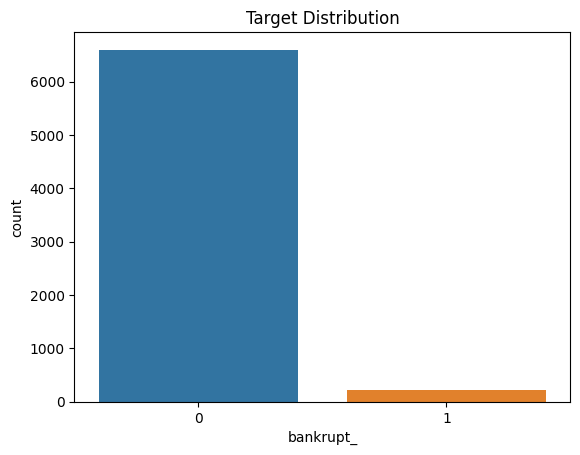

In [ ]:
# target variable distribution
print(df.bankrupt_.value_counts())
sns.countplot(x = df.bankrupt_);
plt.title("Target Distribution")
plt.show()

In [ ]:
# Lets split features and target variable into X and y
X = df.drop(['bankrupt_'],axis=1)
y = df['bankrupt_']

In [ ]:
# Lets oversample our dataset using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

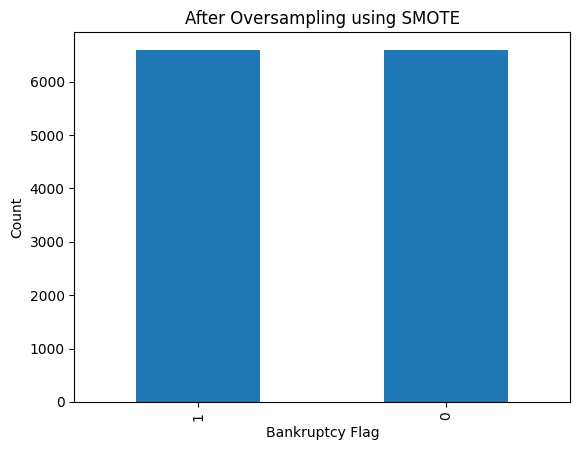

In [ ]:
# After Oversampling using SMOTE
y_res.value_counts().plot(kind="bar")
plt.xlabel("Bankruptcy Flag")
plt.ylabel("Count")
plt.title("After Oversampling using SMOTE")
plt.show()

## Outlier Analysis Function

In [ ]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3 - q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr

    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence

    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence

    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss

## Hypothesis Testing Function

In [ ]:
def hypotesis_testing(data, value, variable):
    frame=data[[variable, value]]
    formula=f'{value} ~ {variable}'
    model=ols(formula, frame).fit()
    print(model.summary(), "\n", "#"*50)

    p_value=np.round(model.f_pvalue, 3)
    print("p_value:", p_value)

    if p_value<0.05:
        print("Reject Null Hypothesis and accept the alternate hypothesis")
    else:
        print("Accept the Null Hypothesis")

## General Data Preprocessing Note

In [ ]:
from pycaret.anomaly import *
s = setup(df, session_id = 42)

## Handling Outliers

In [ ]:
for col in df.loc[:, df.columns != 'bankrupt_']:
  print(col, tukeys_method(df.loc[:, df.columns != 'bankrupt_'], col))

roa_c_before_interest_and_depreciation_before_interest ([56, 1035, 1382, 1443, 1581, 1684, 1686, 1688, 1753, 1755, 1861, 1865, 1870, 1938, 1949, 1951, 2009, 2293, 2295, 2339, 2435, 2553, 2573, 2770, 3171, 3207, 3224, 3303, 3385, 3392, 3540, 3550, 3595, 3597, 3695, 3749, 3906, 4114, 4217, 4327, 4481, 4530, 4618, 4621, 4636, 4734, 4824, 4877, 4918, 5033, 5163, 5393, 5609, 5662, 6106, 6442, 6467, 6565, 6610, 6613, 6640, 6700, 6789], [0, 56, 119, 232, 235, 305, 427, 448, 595, 599, 664, 712, 750, 759, 781, 838, 865, 957, 1035, 1052, 1103, 1134, 1179, 1190, 1358, 1382, 1410, 1419, 1425, 1426, 1427, 1429, 1431, 1440, 1443, 1481, 1500, 1517, 1520, 1526, 1568, 1574, 1577, 1581, 1595, 1624, 1630, 1661, 1679, 1684, 1686, 1688, 1695, 1751, 1753, 1754, 1755, 1757, 1777, 1801, 1803, 1805, 1807, 1818, 1829, 1832, 1833, 1836, 1846, 1860, 1861, 1865, 1870, 1871, 1886, 1908, 1929, 1932, 1938, 1949, 1951, 1967, 1969, 1973, 1977, 2000, 2004, 2009, 2024, 2026, 2088, 2099, 2123, 2147, 2173, 2198, 2242, 2271

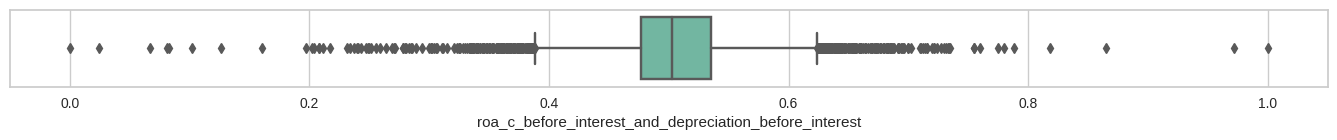

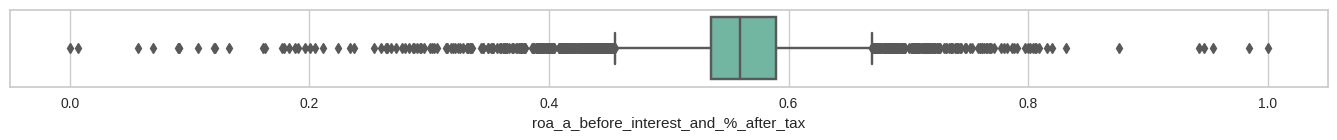

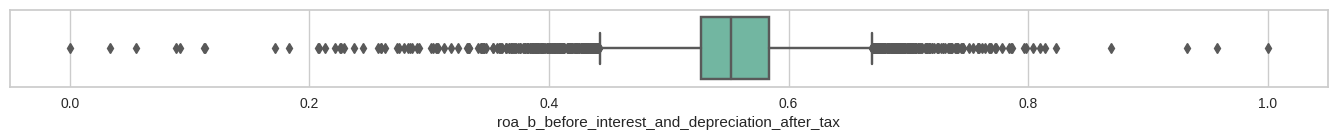

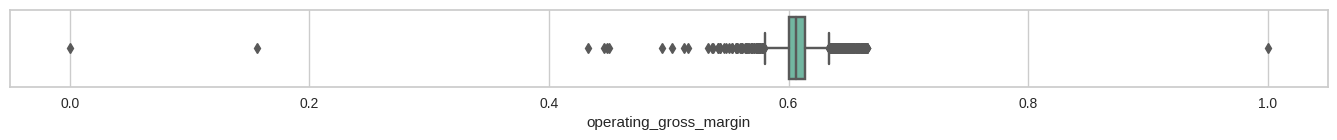

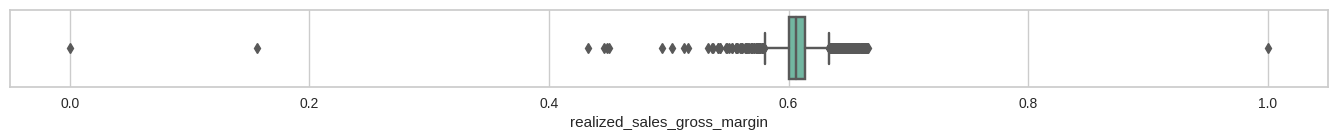

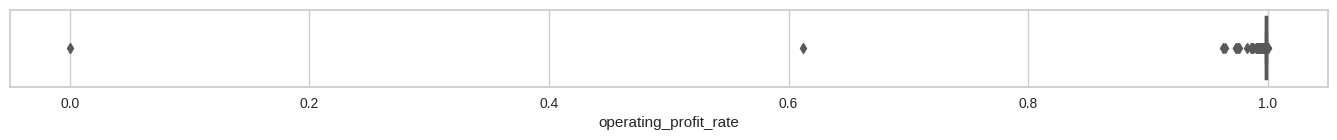

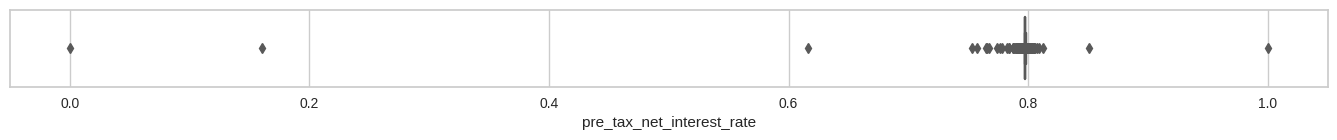

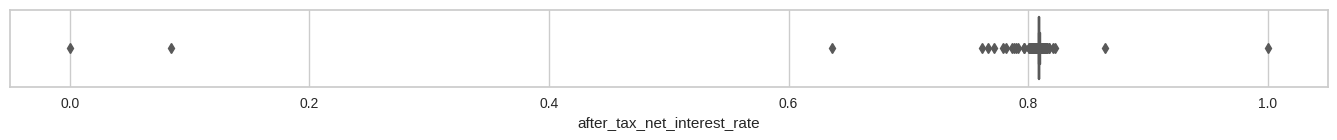

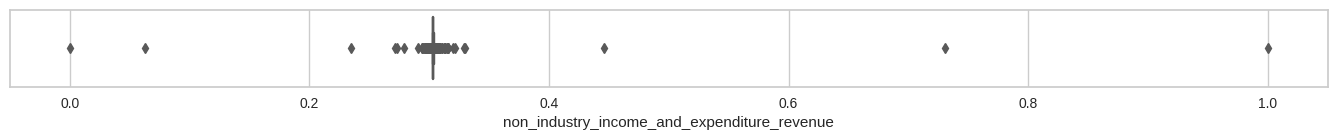

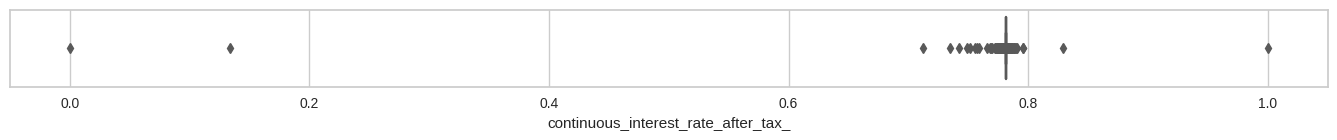

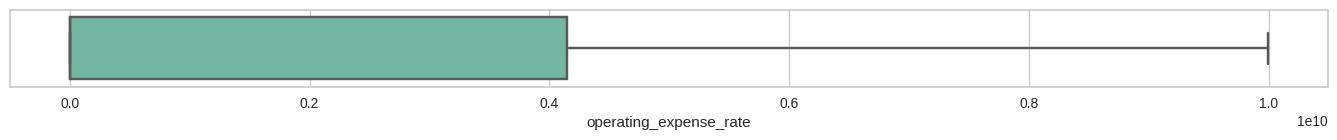

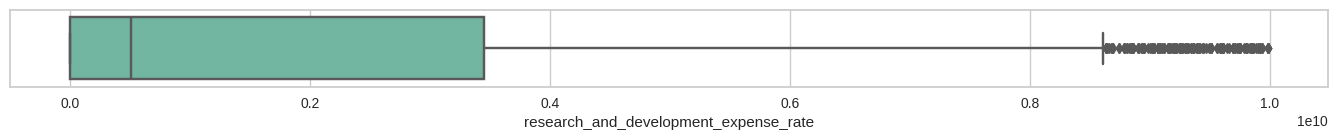

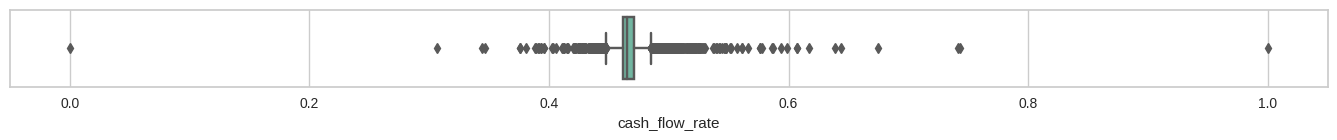

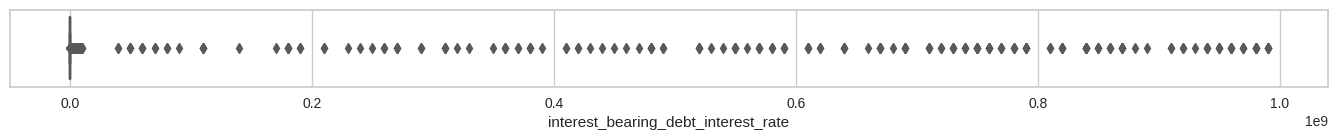

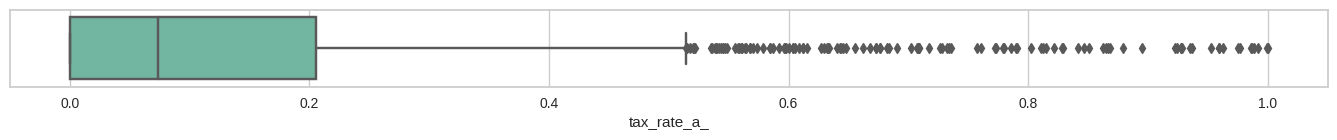

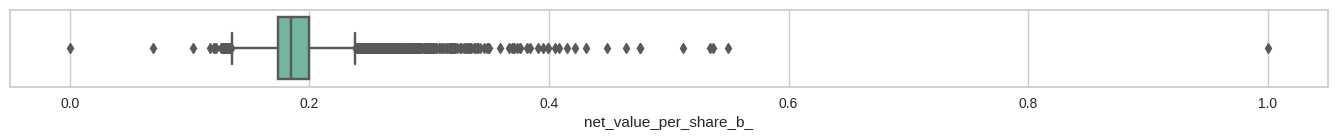

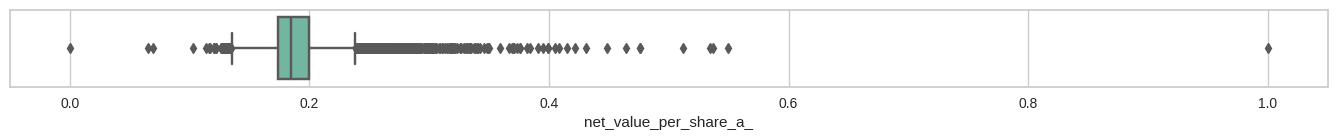

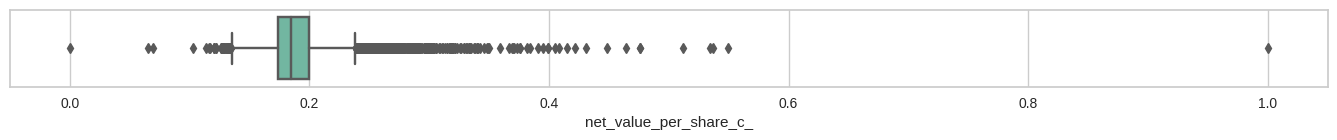

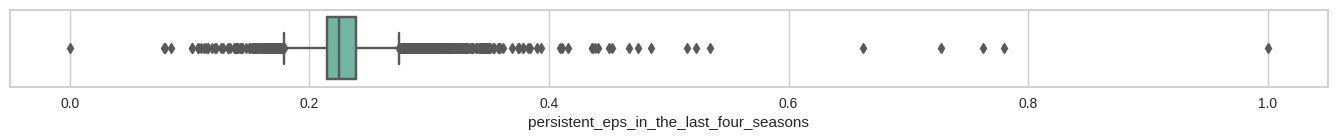

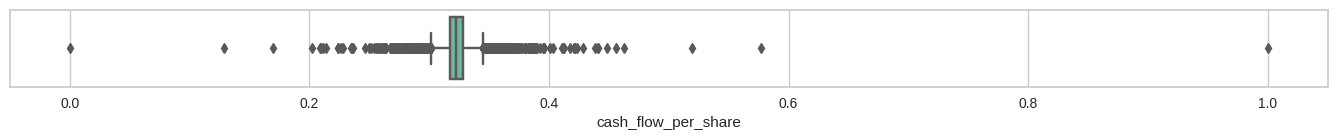

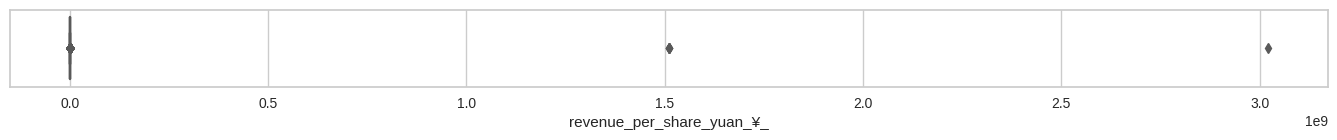

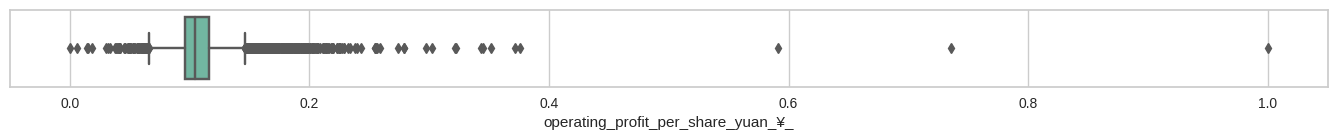

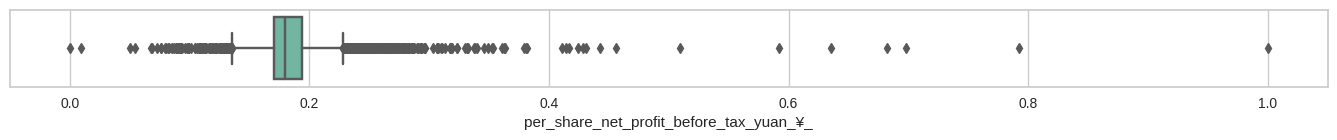

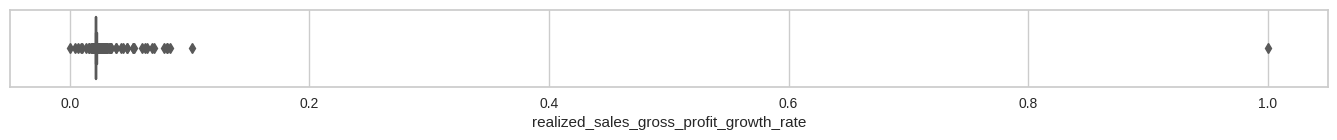

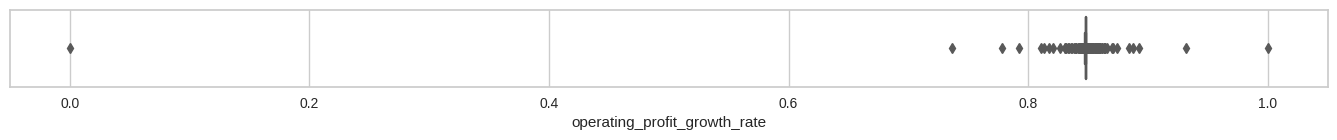

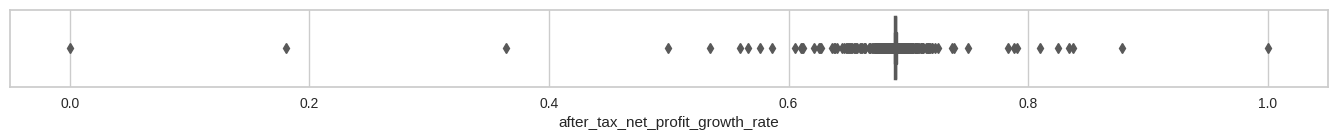

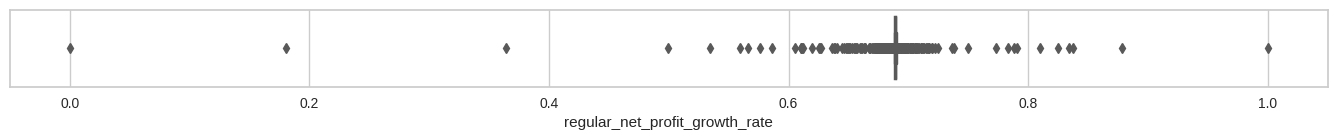

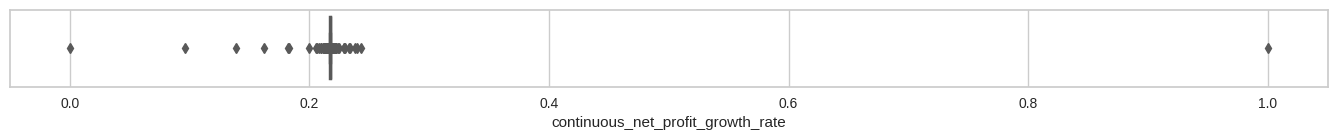

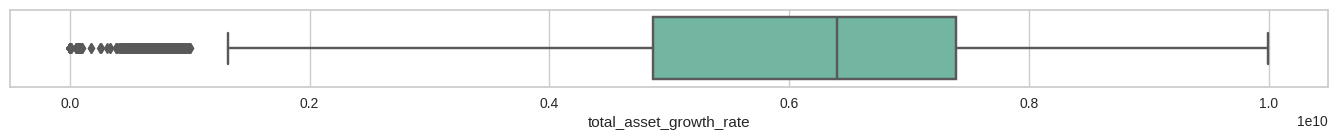

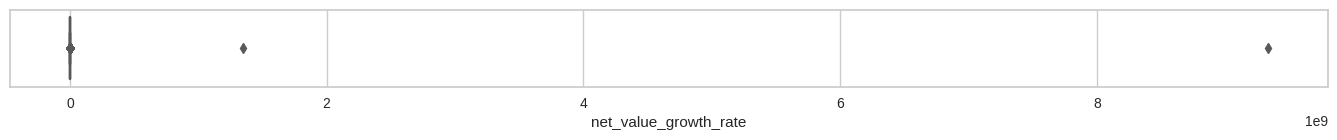

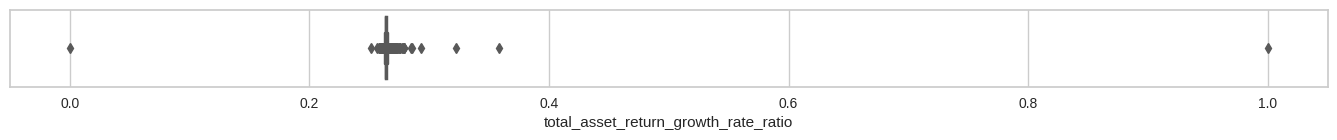

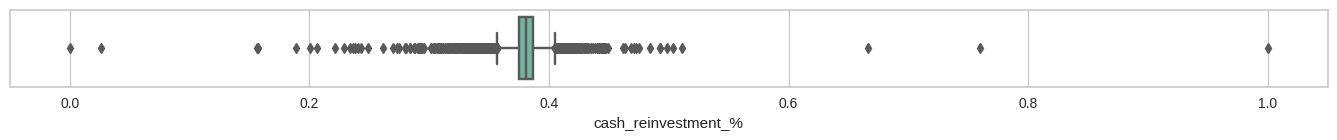

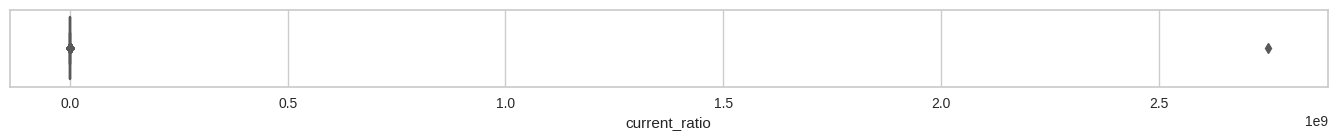

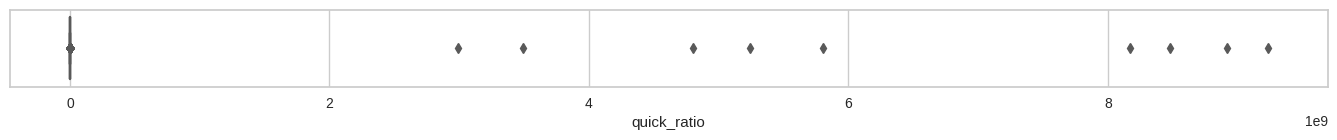

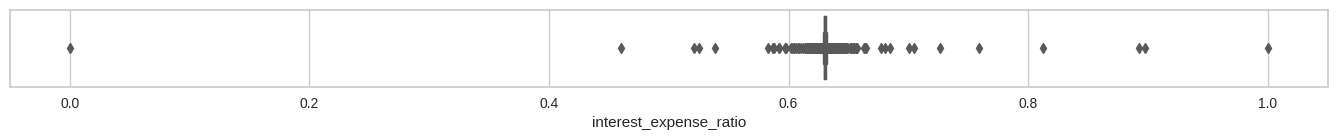

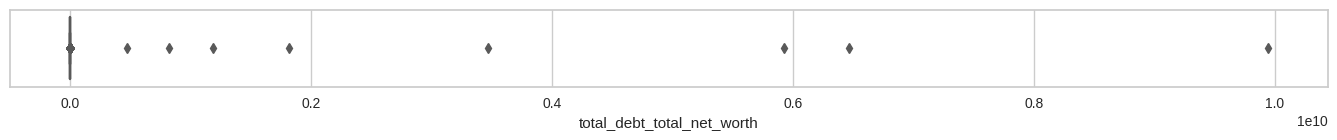

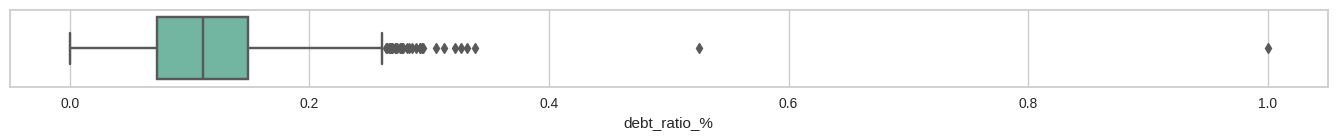

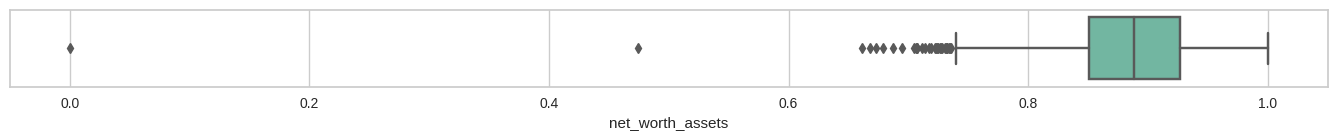

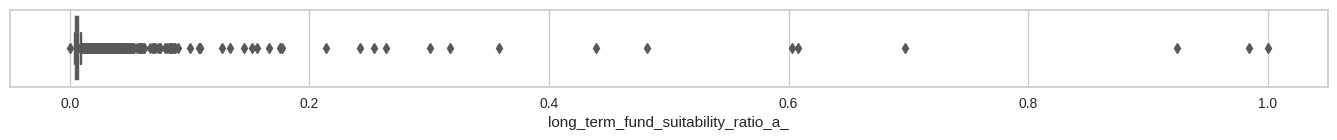

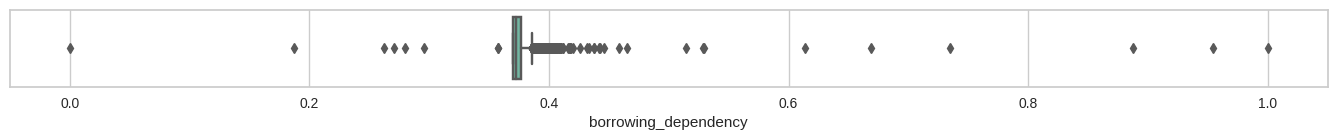

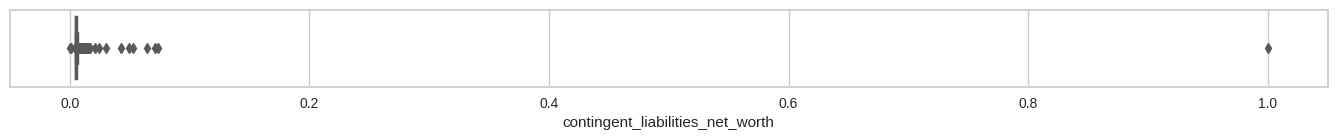

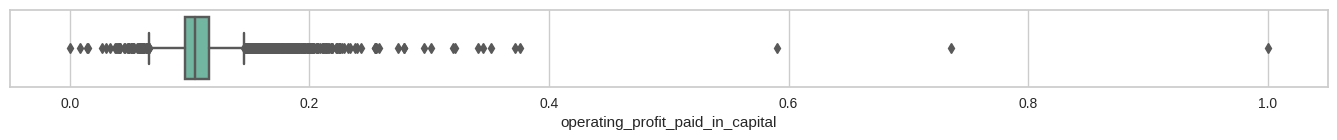

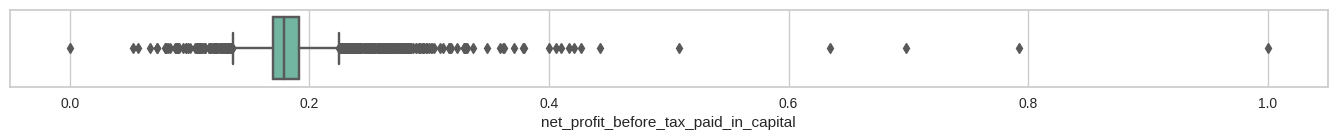

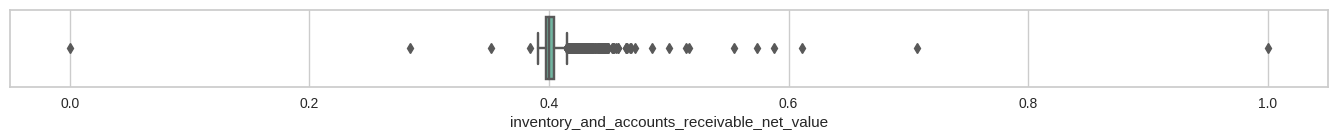

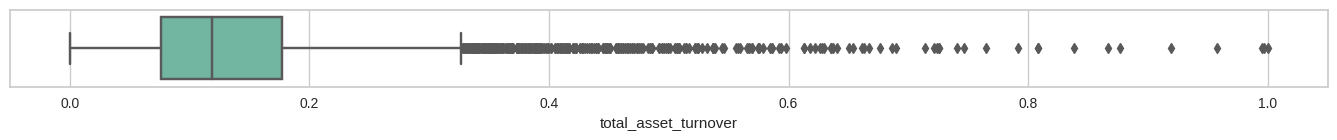

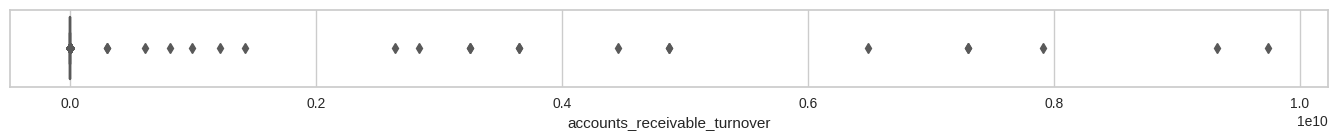

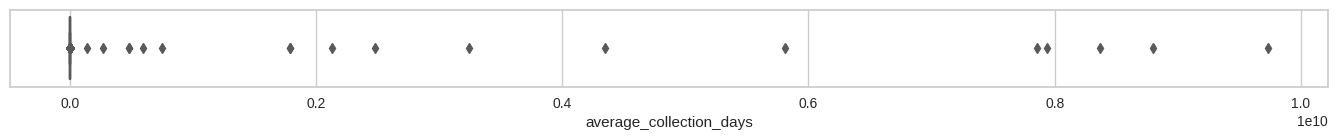

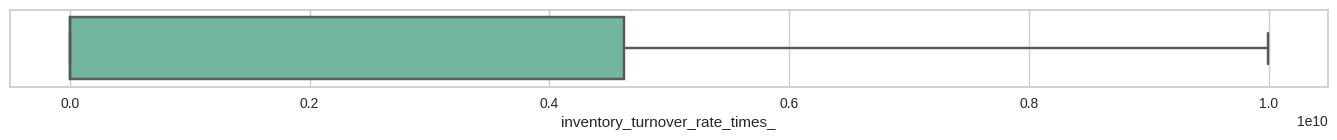

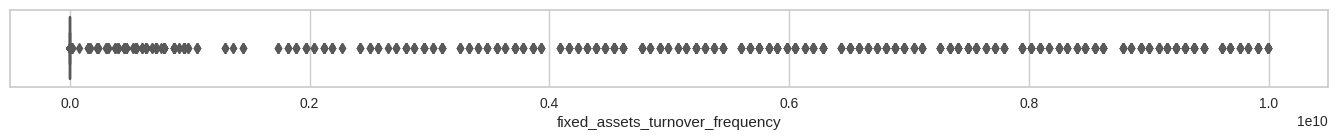

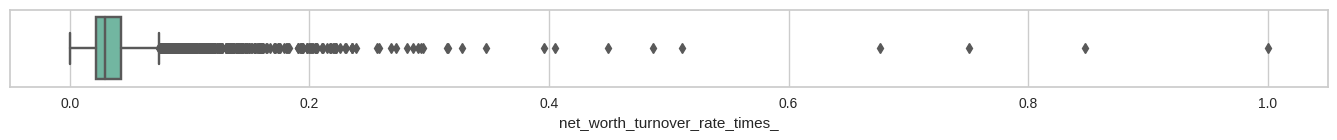

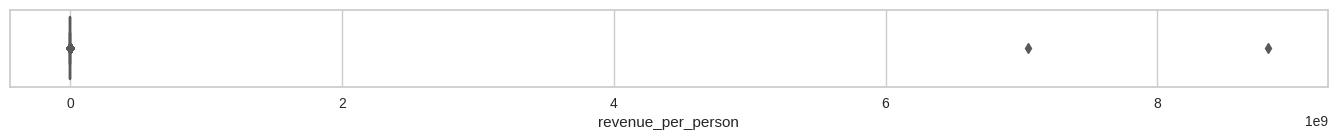

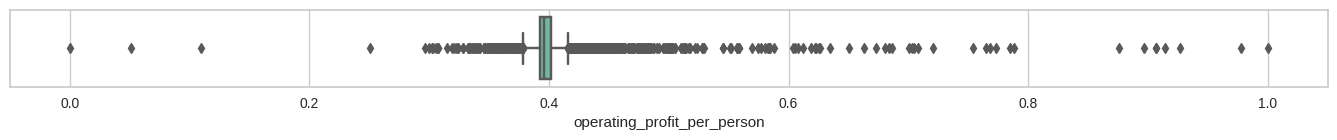

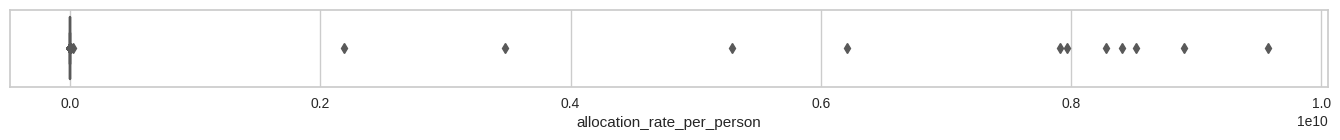

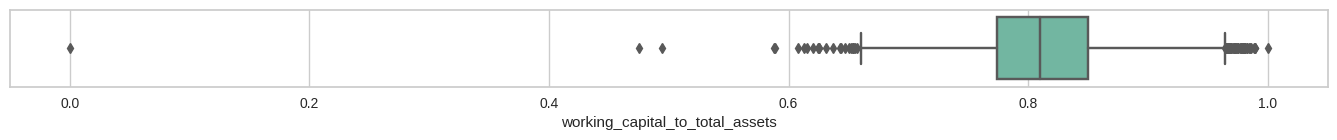

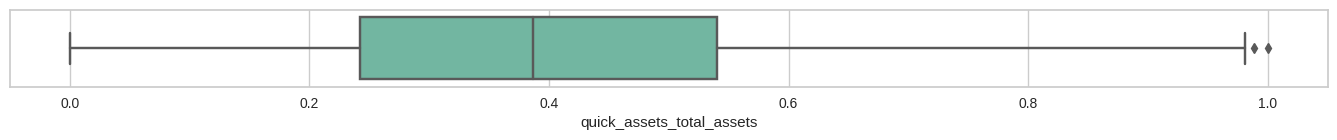

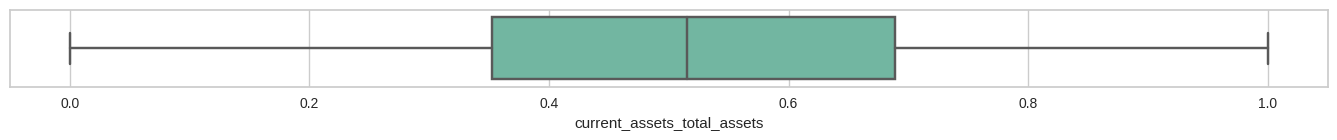

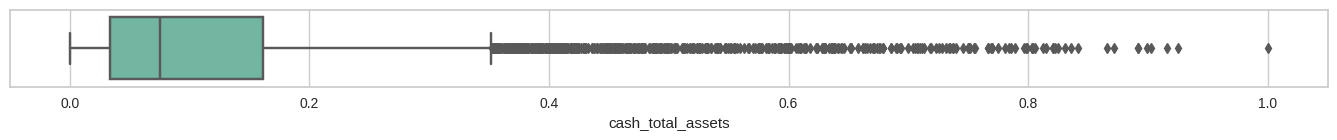

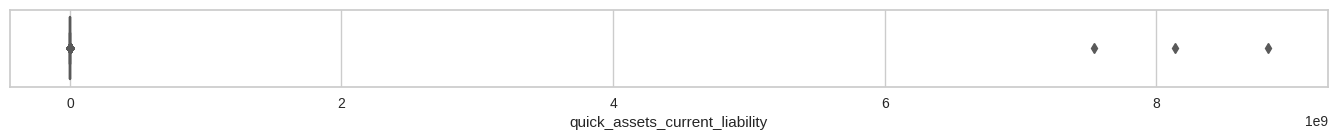

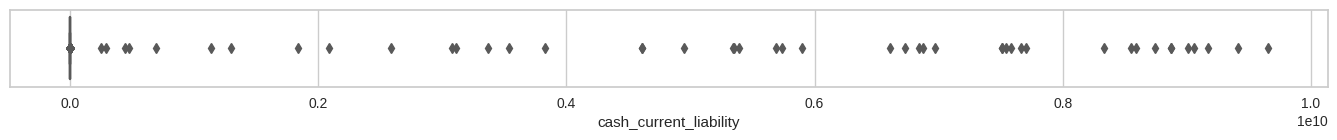

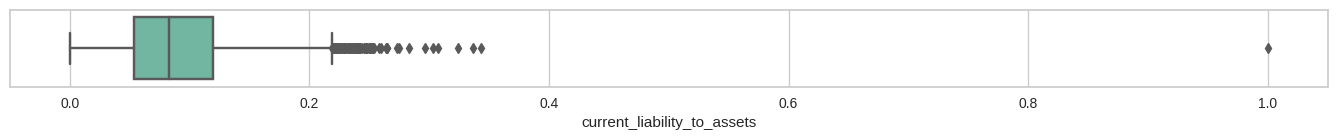

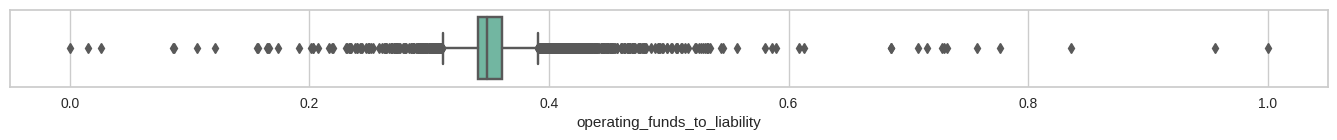

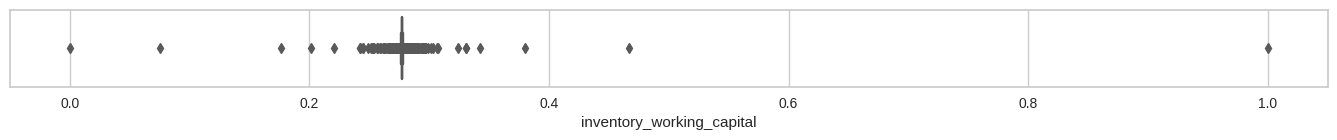

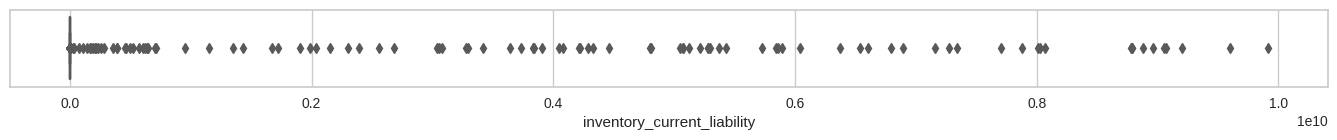

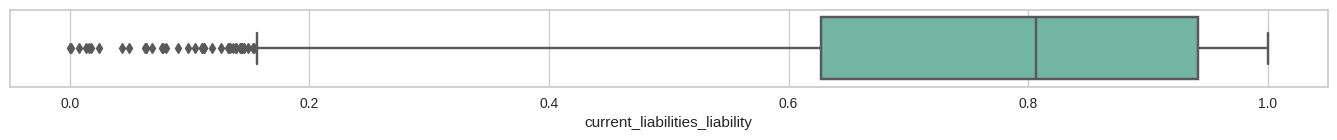

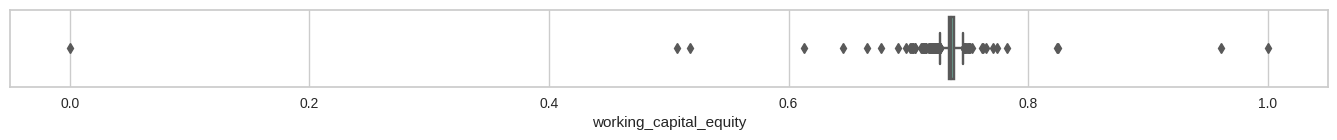

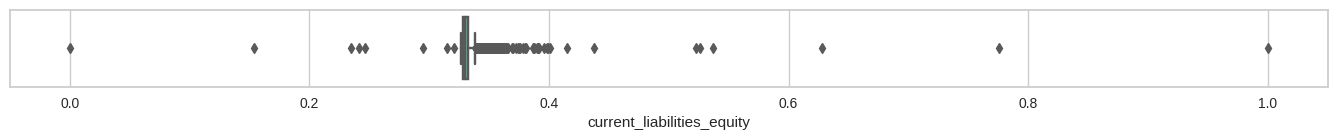

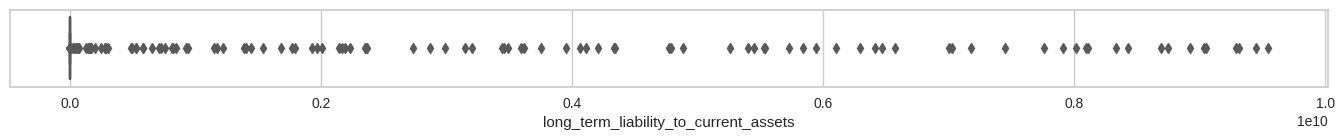

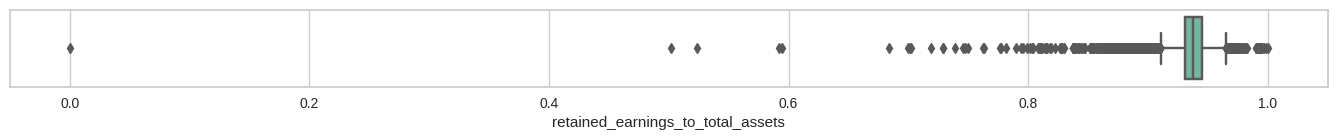

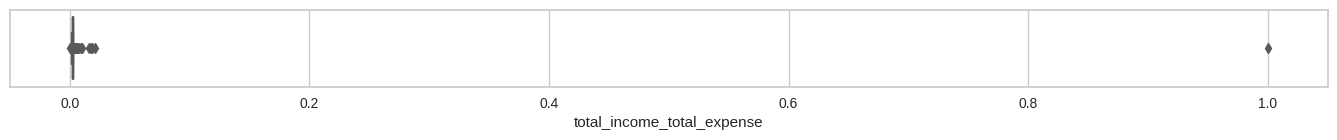

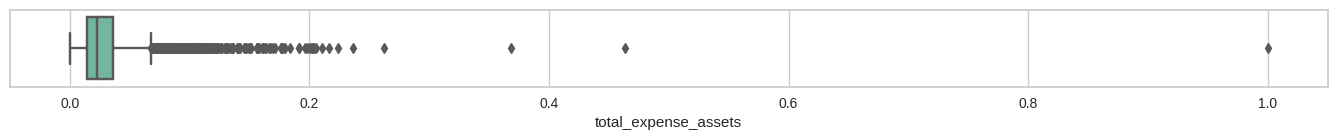

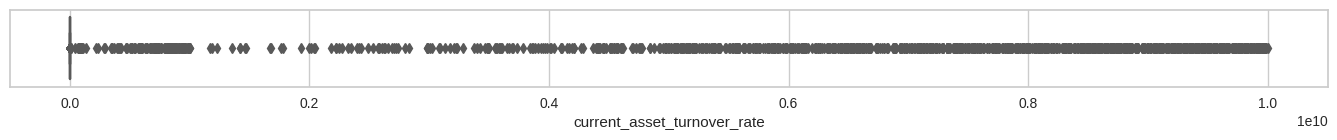

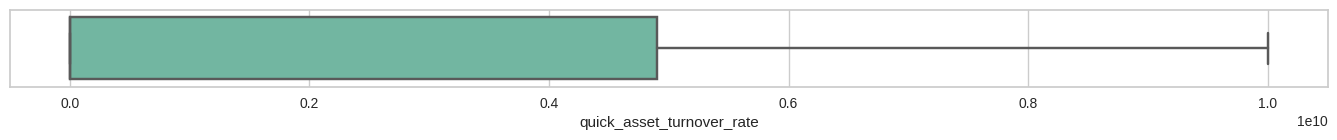

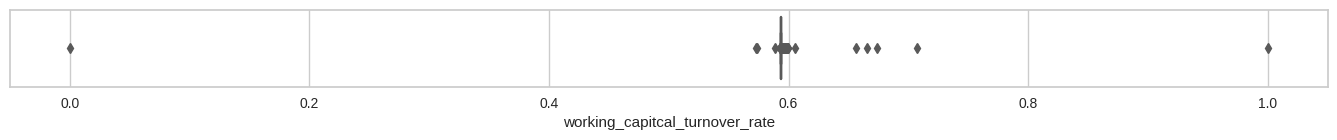

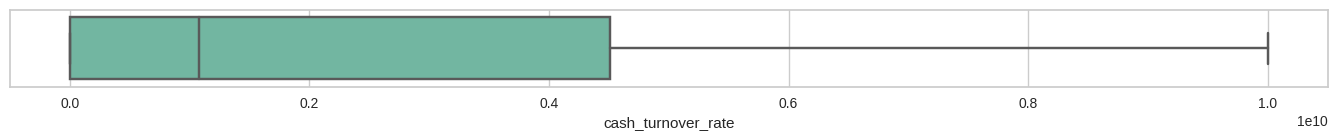

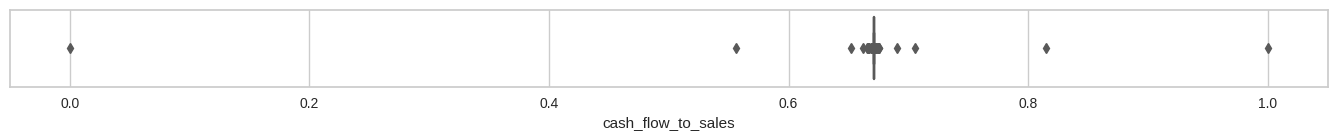

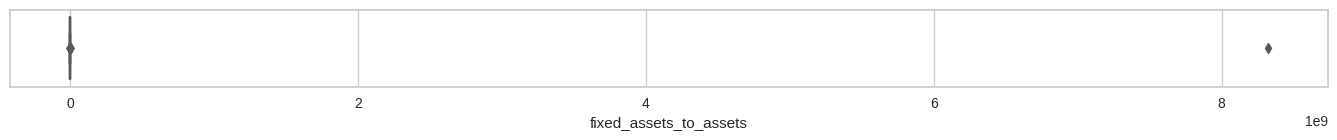

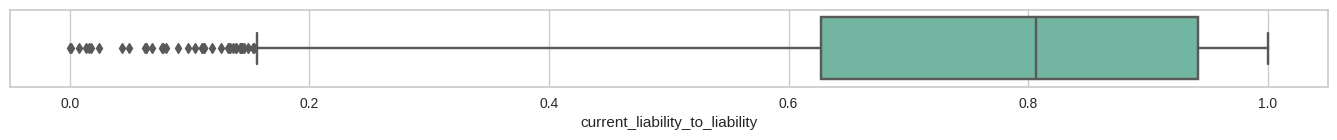

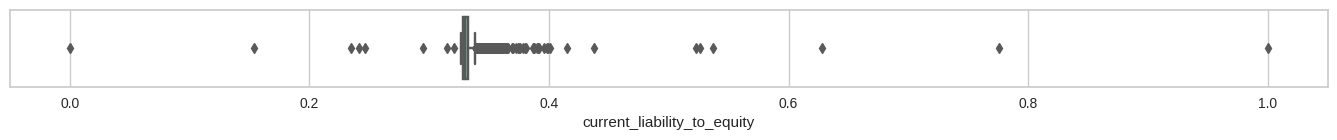

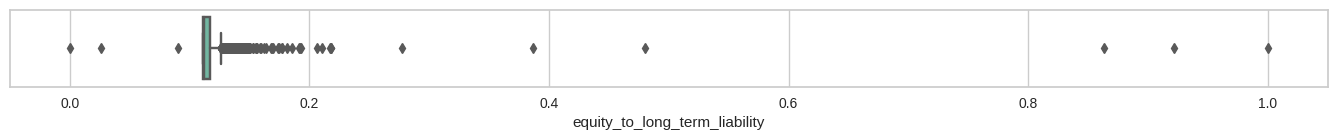

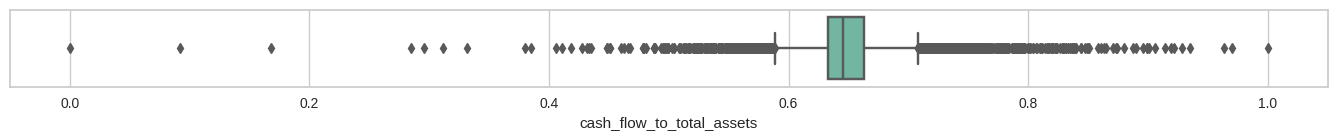

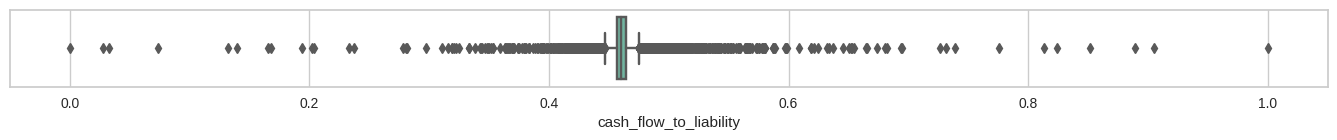

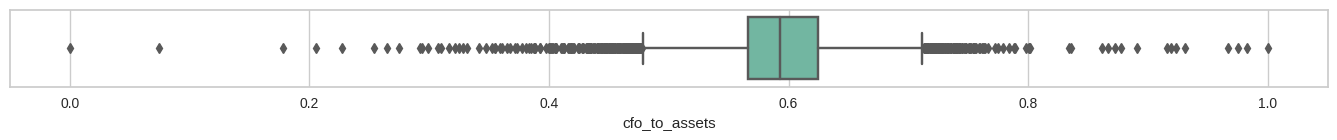

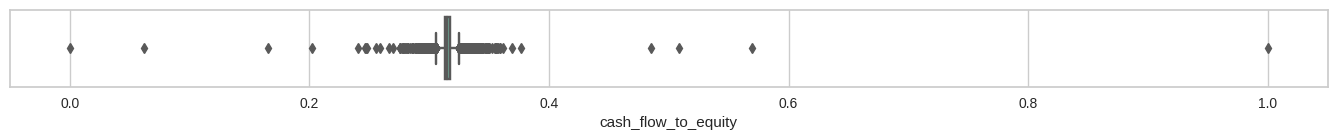

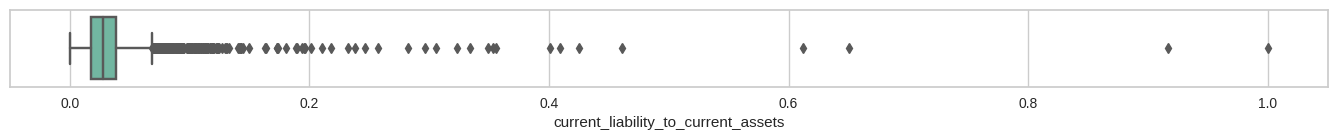

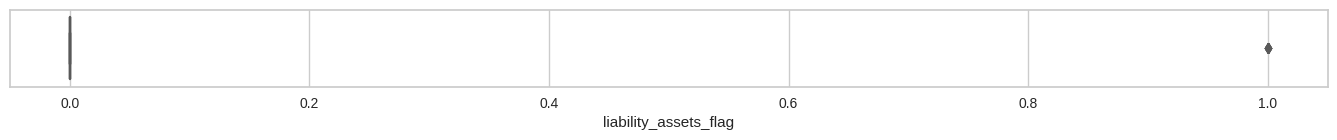

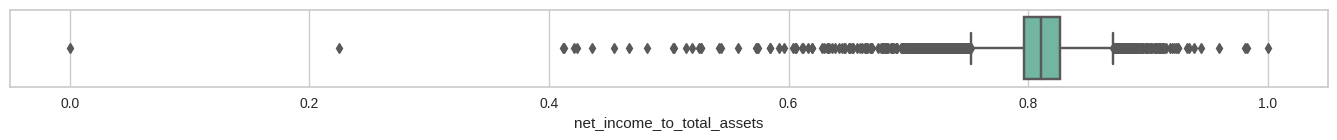

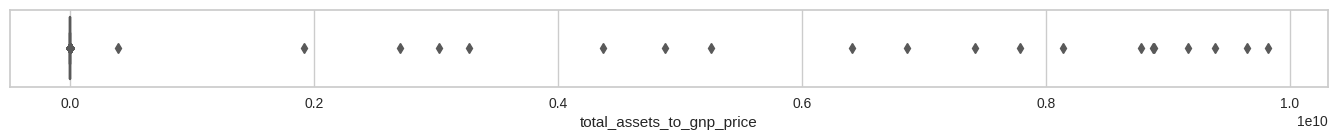

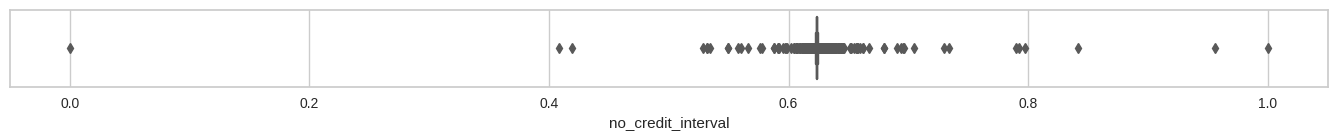

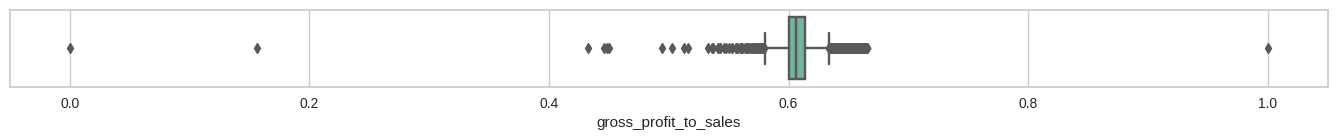

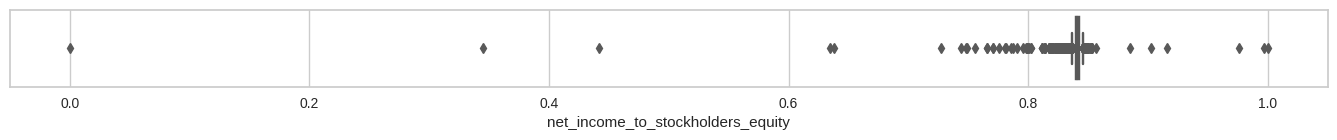

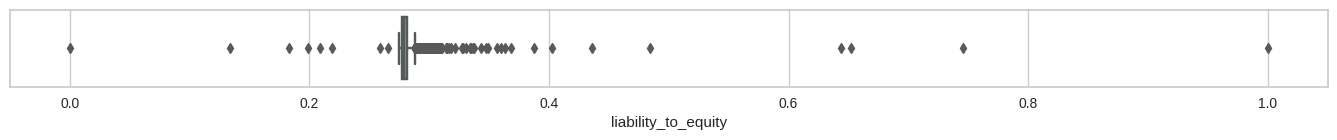

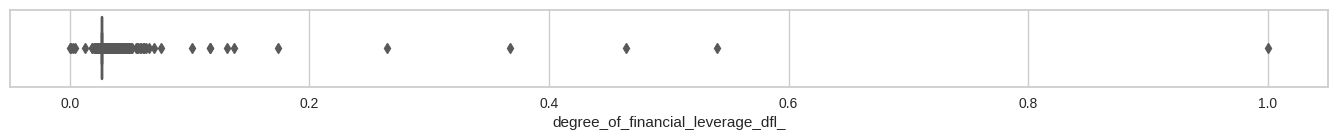

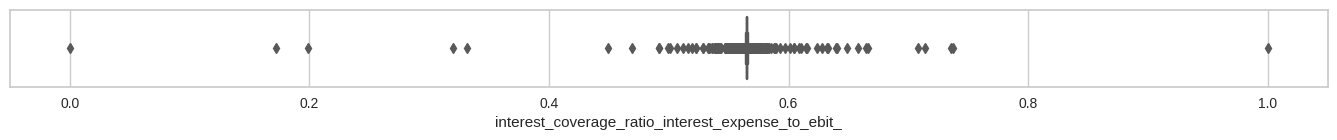

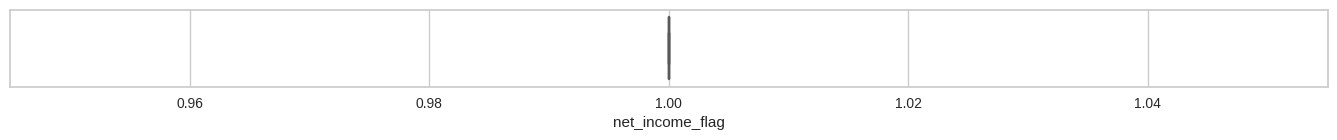

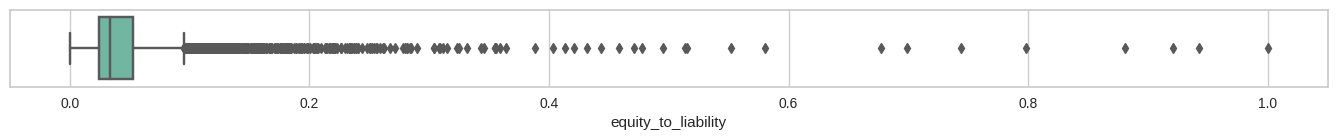

In [ ]:
for column in df.loc[:, df.columns != 'bankrupt_']:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, orient="h", palette="Set2", x=column)

In [ ]:
for col in df.loc[:, df.columns != 'bankrupt_']:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  whisker_width = 1.5
  lower_whisker = q1 - (whisker_width * iqr)
  upper_whisker = q3 + whisker_width * iqr
  df[col] = np.where(df[col] > upper_whisker, upper_whisker, np.where(df[col] < lower_whisker, lower_whisker, df[col]))

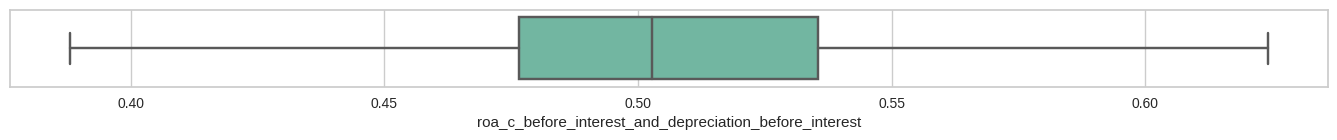

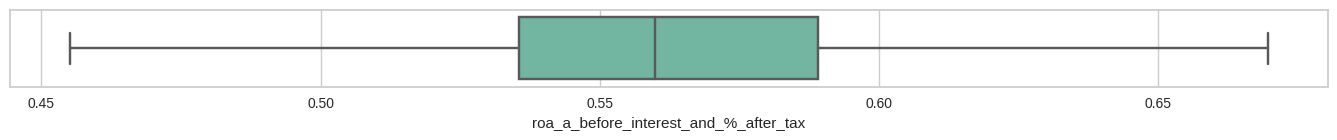

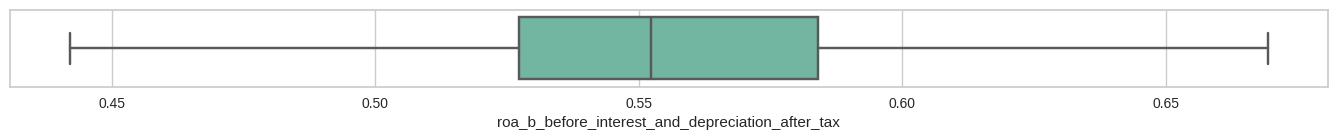

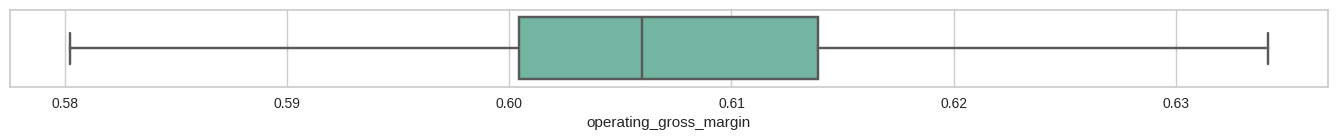

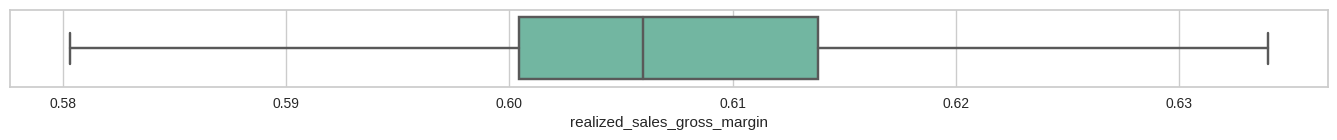

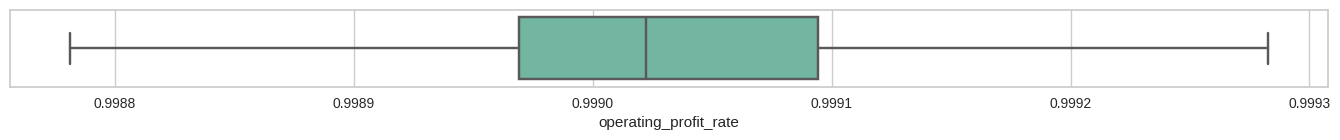

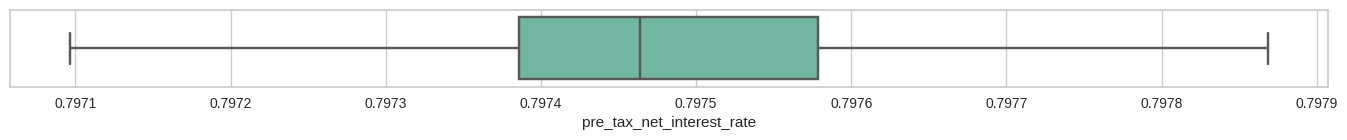

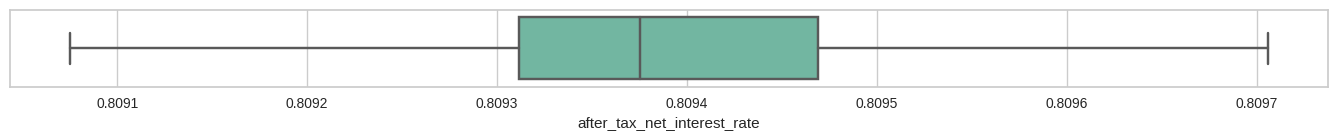

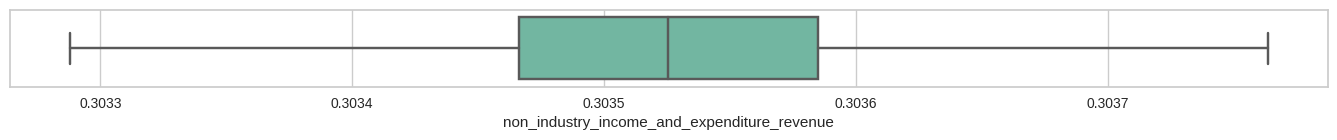

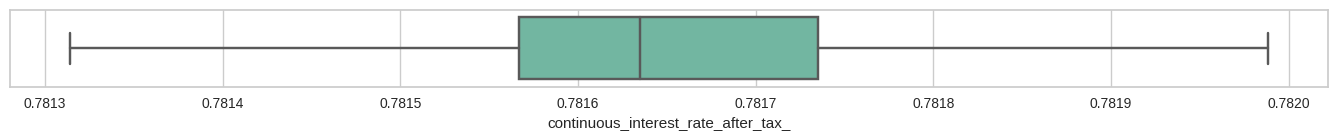

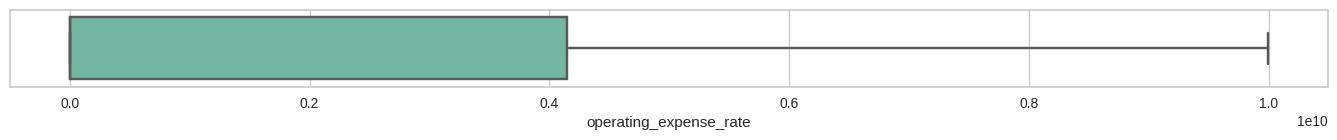

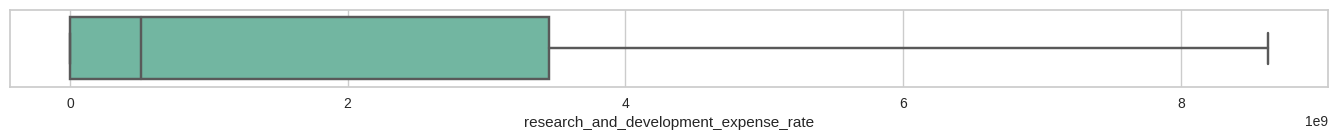

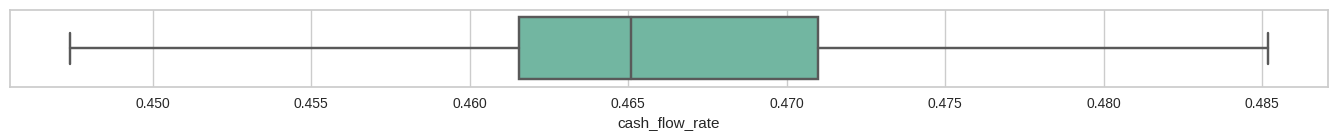

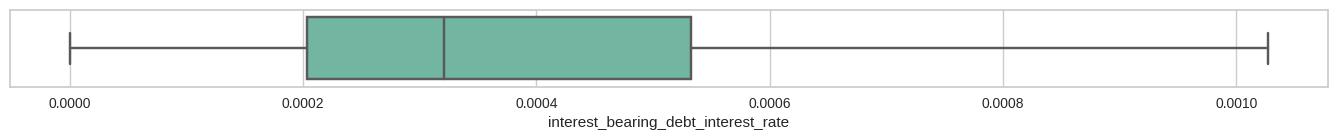

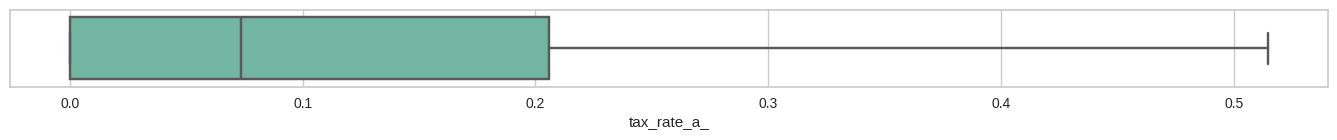

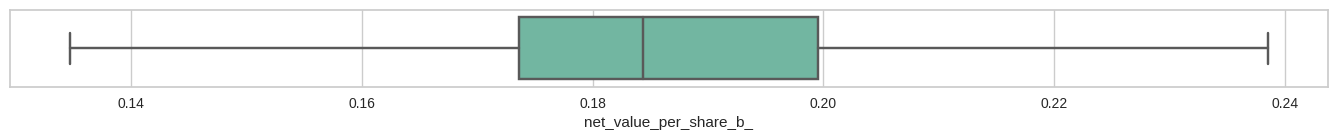

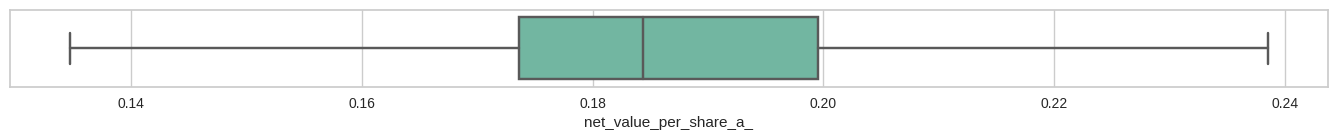

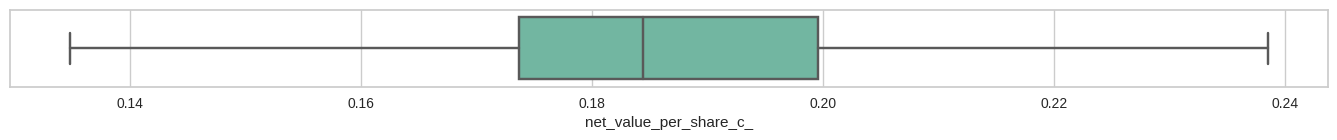

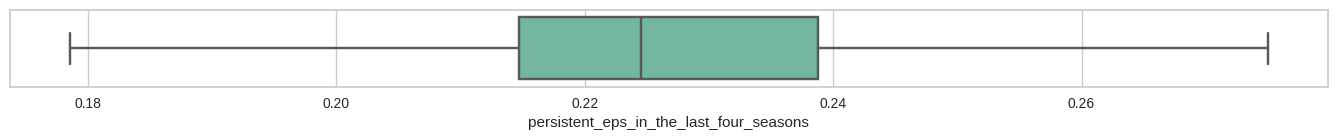

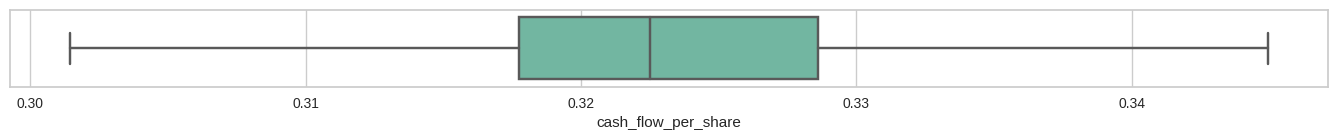

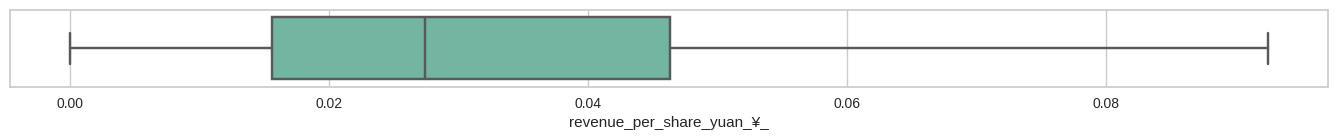

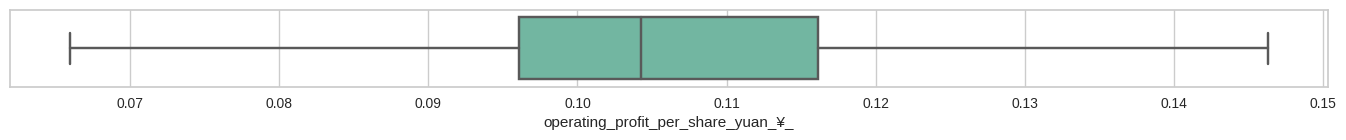

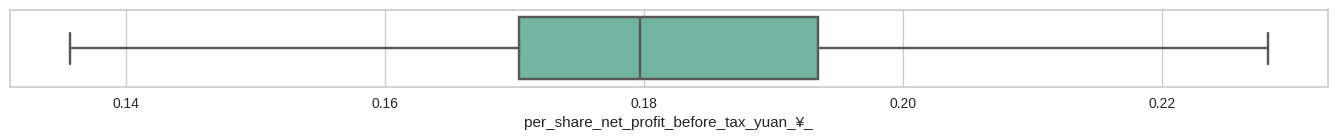

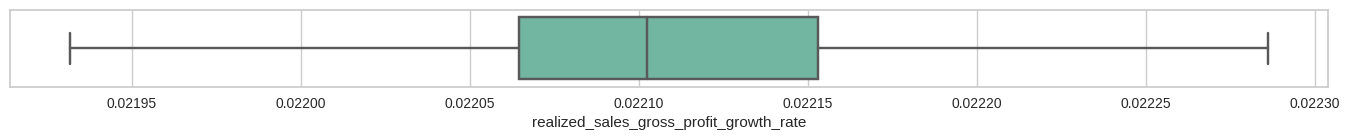

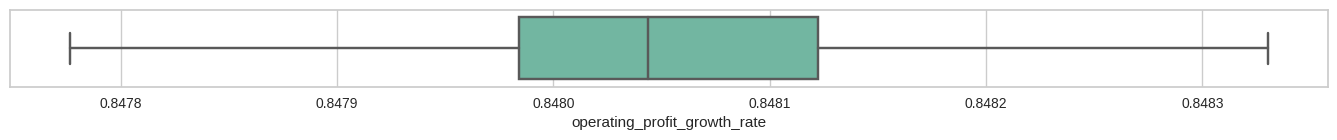

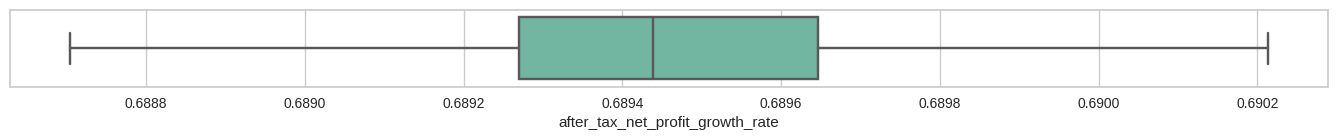

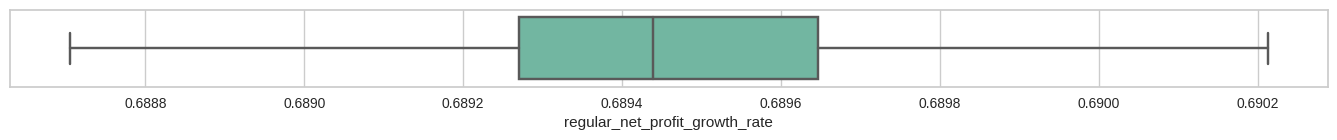

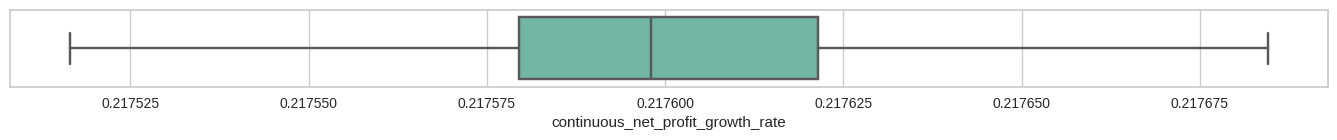

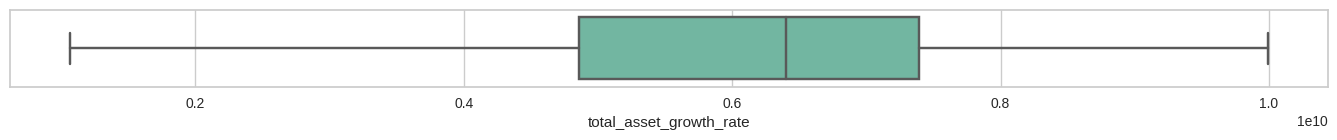

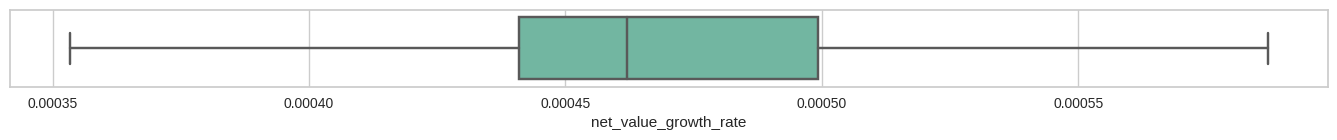

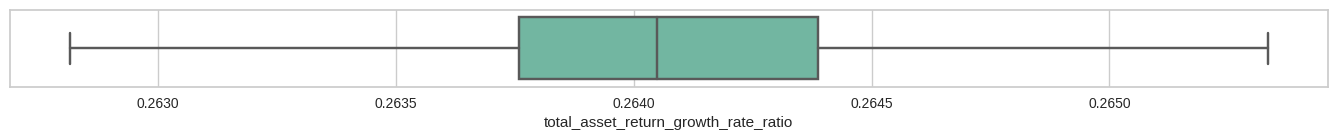

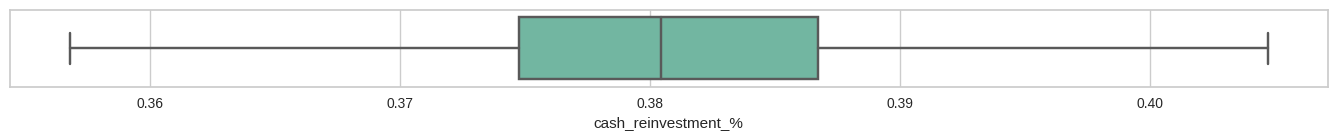

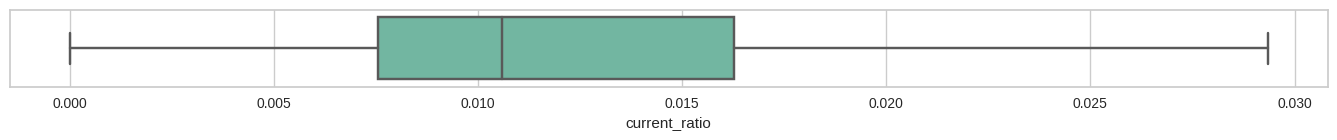

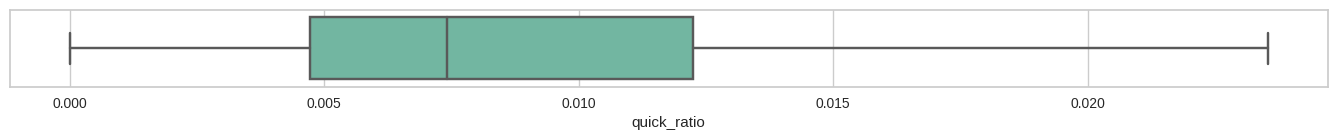

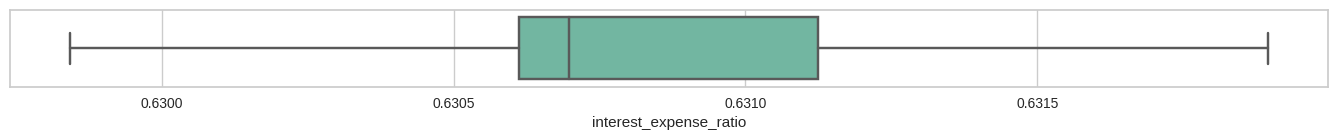

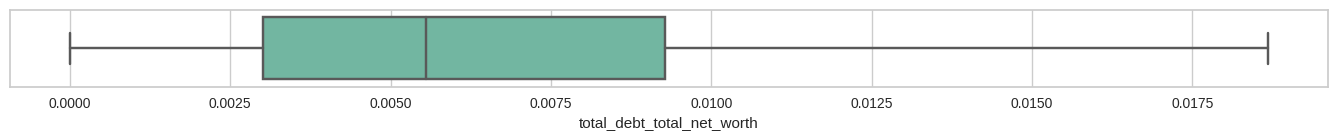

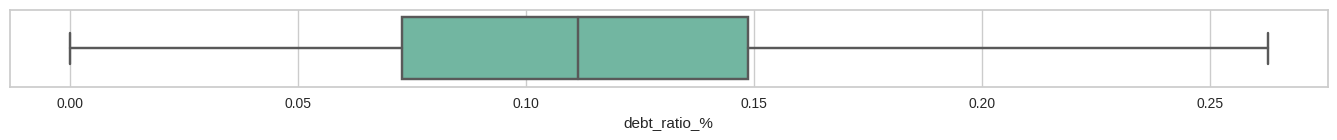

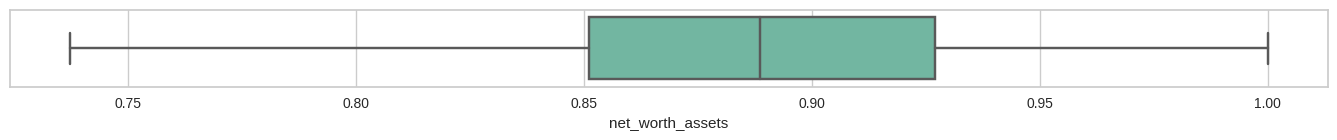

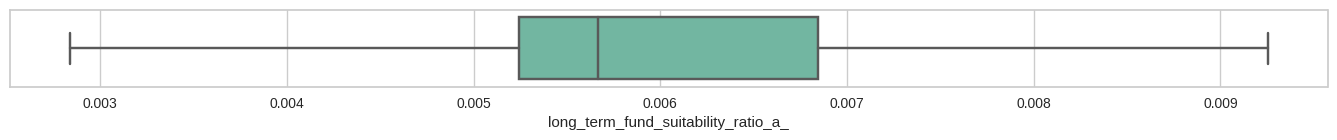

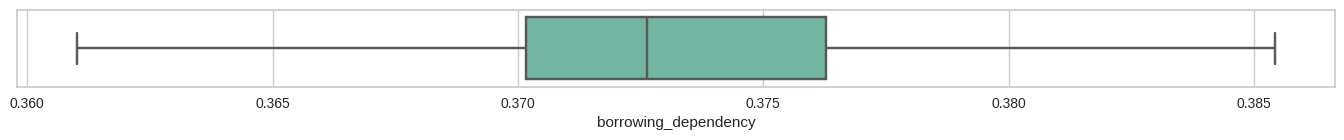

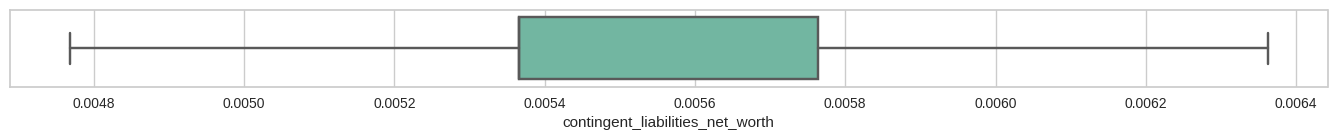

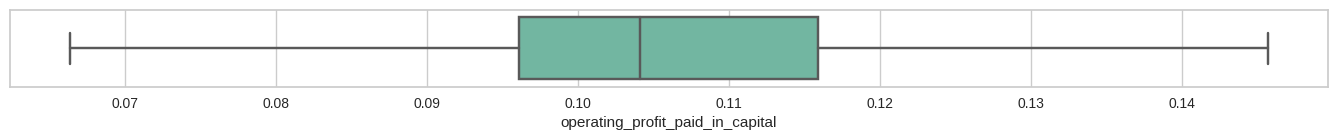

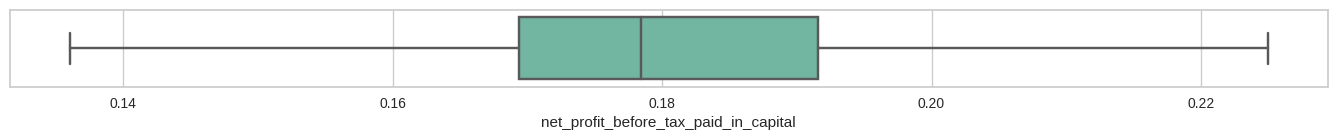

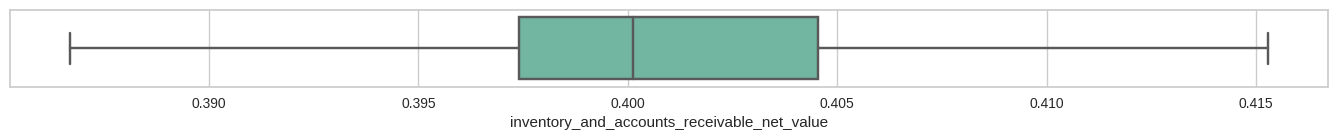

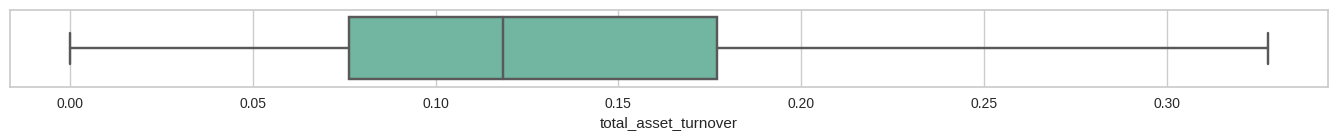

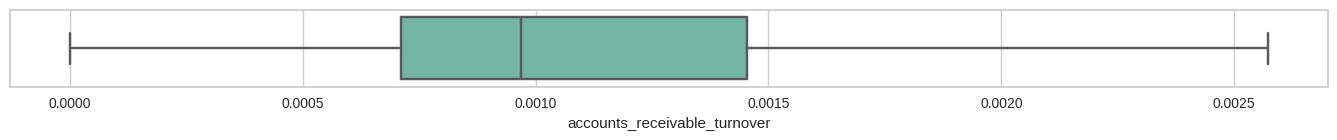

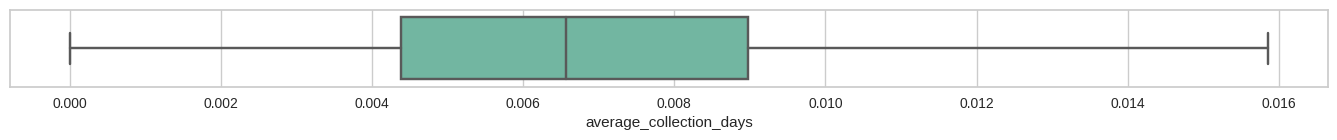

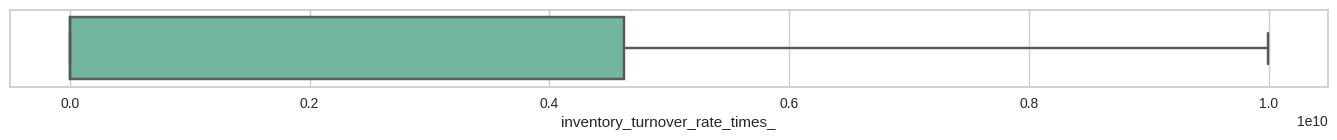

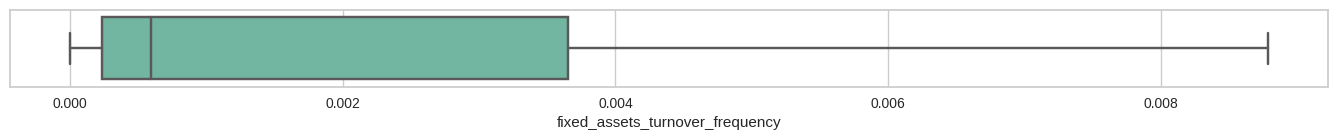

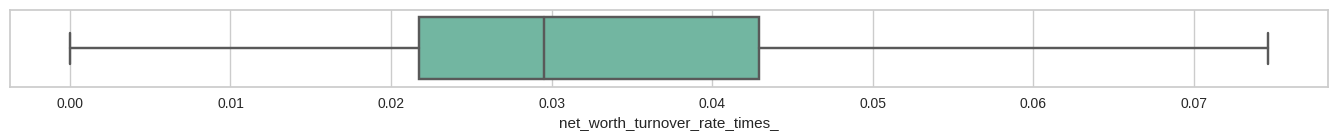

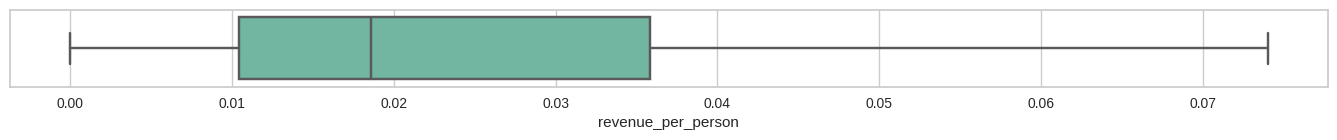

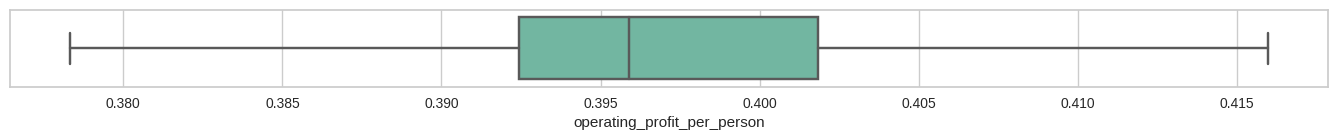

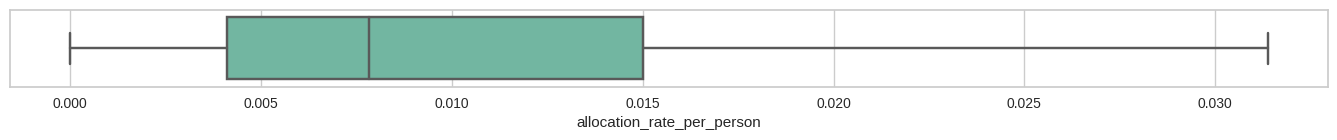

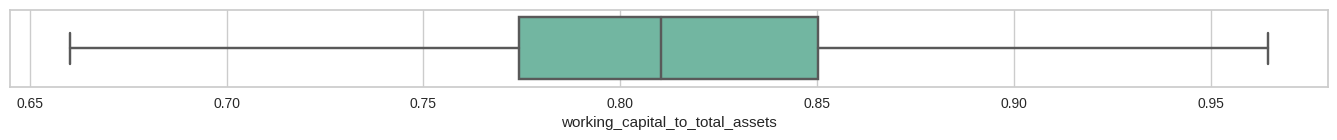

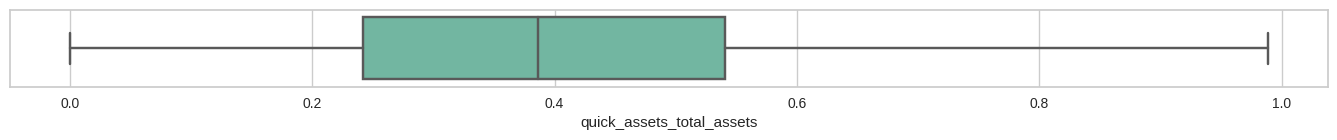

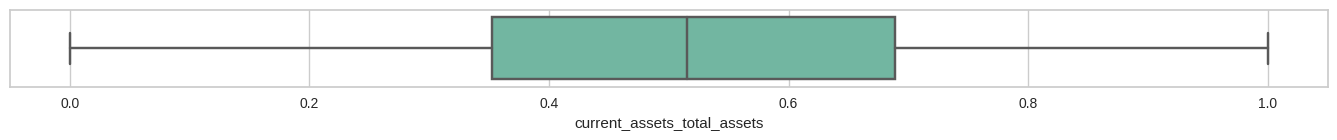

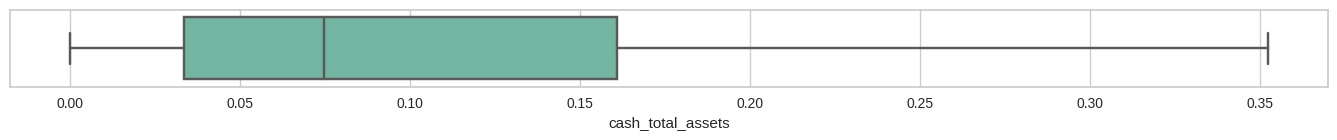

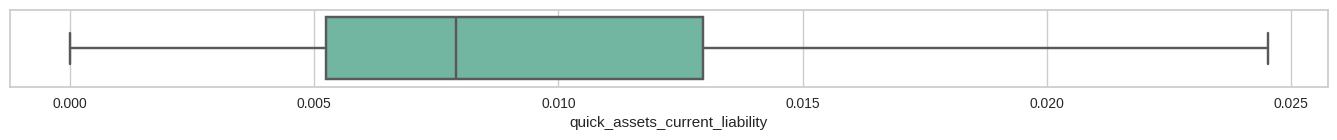

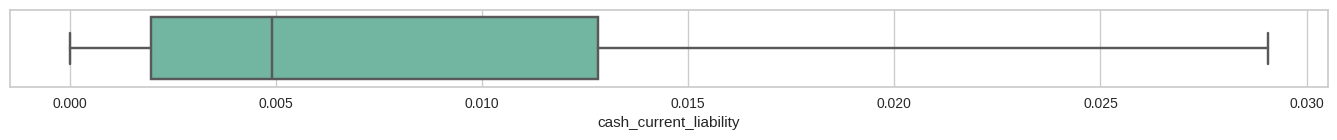

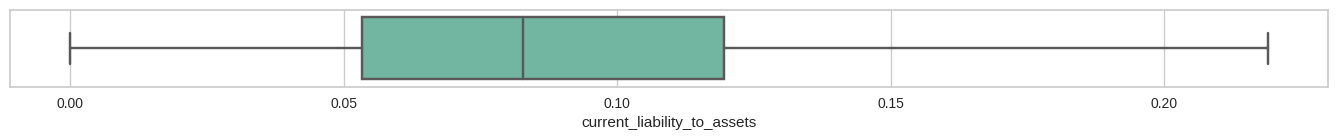

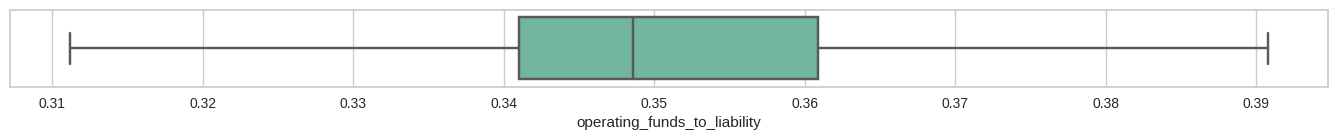

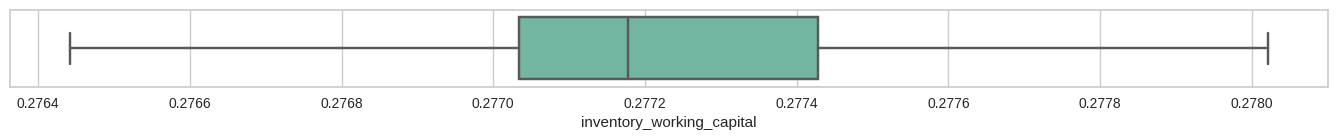

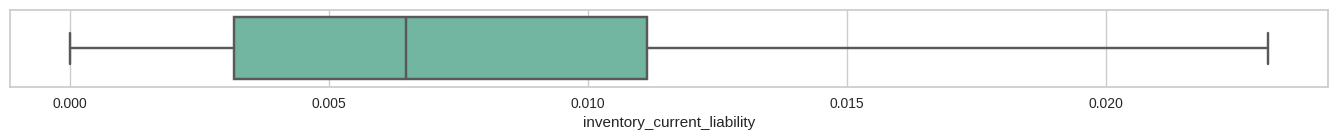

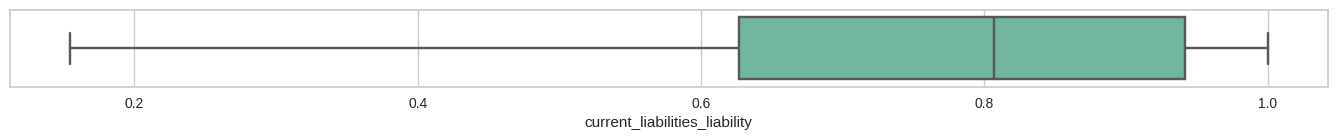

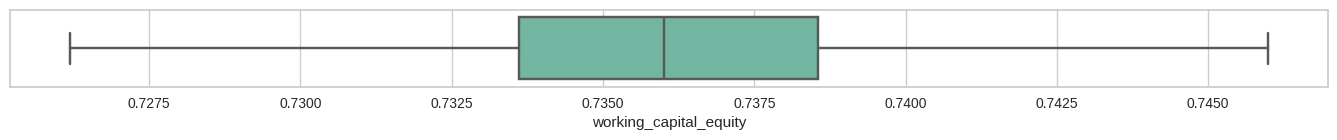

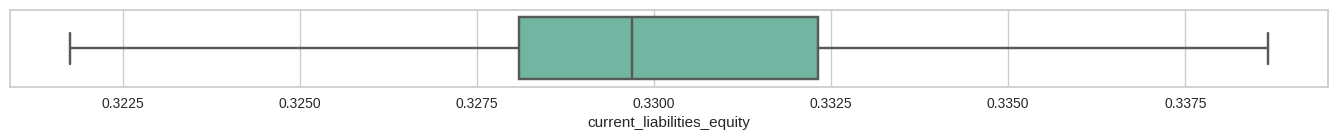

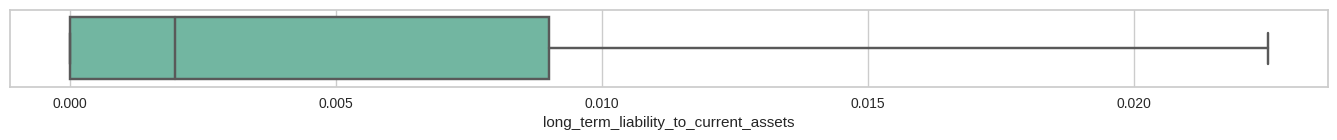

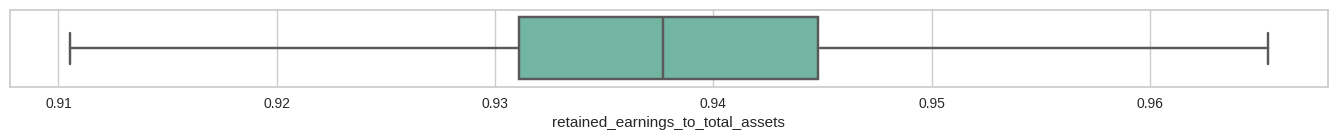

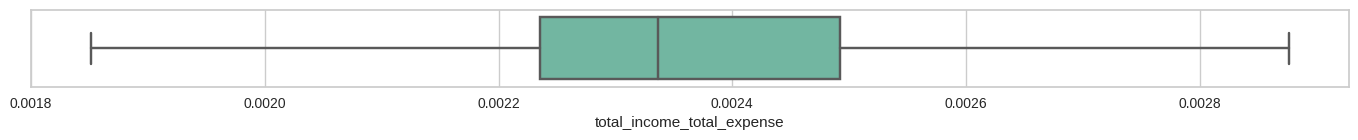

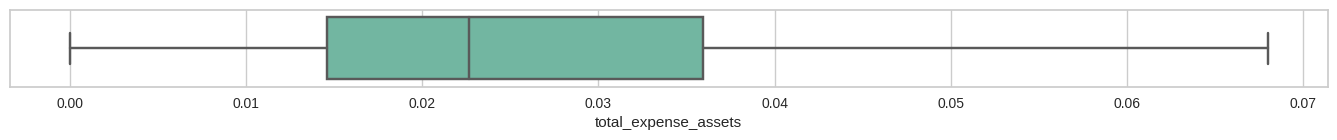

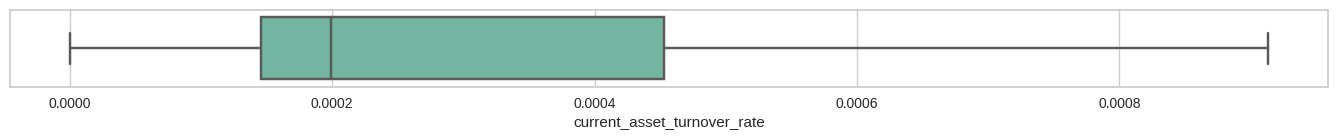

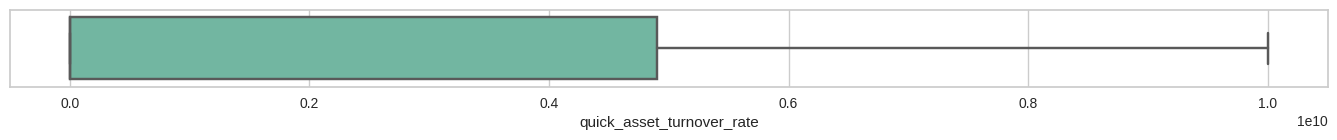

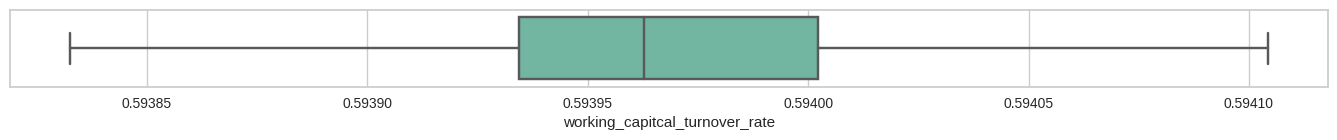

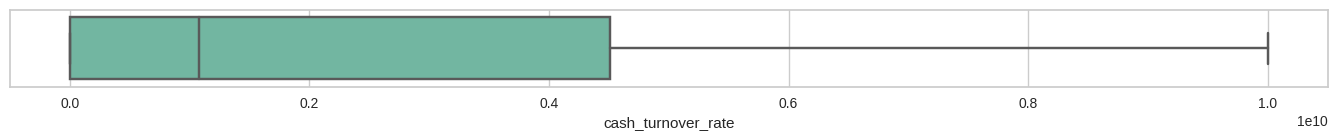

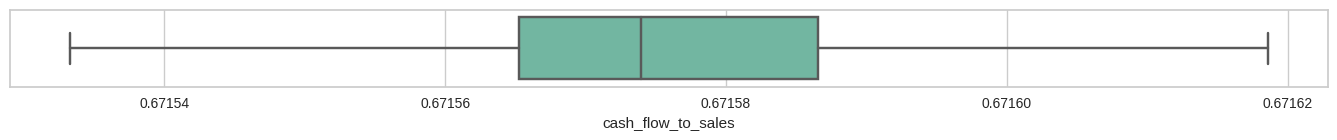

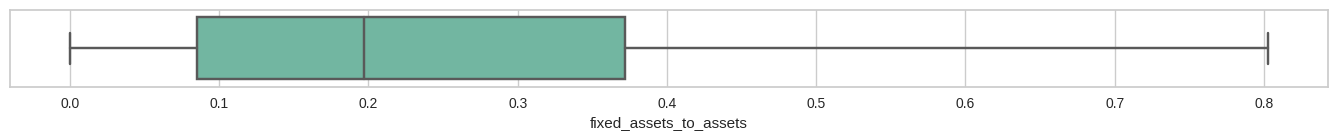

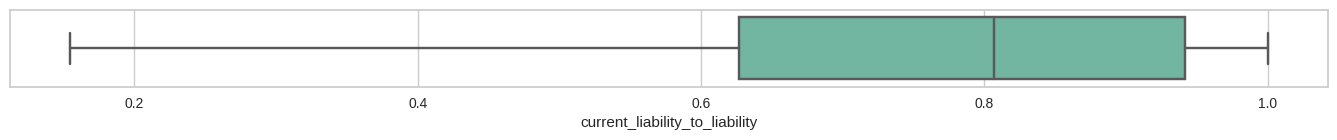

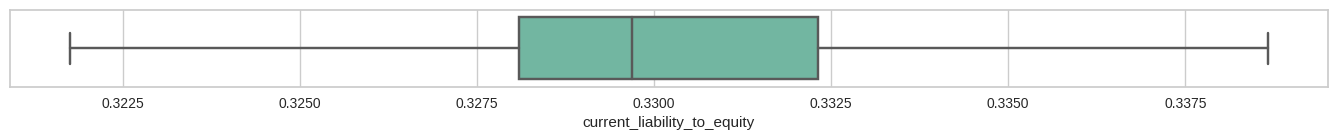

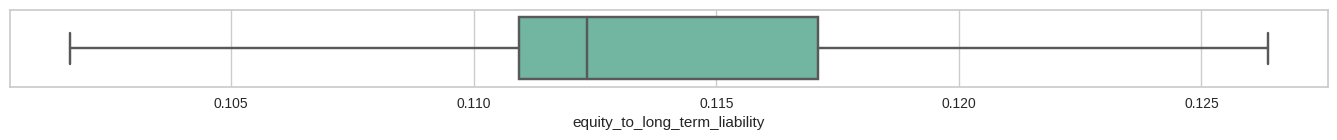

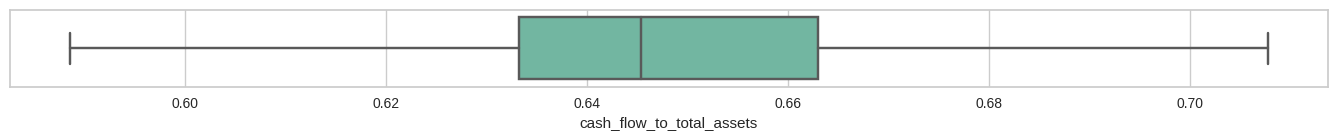

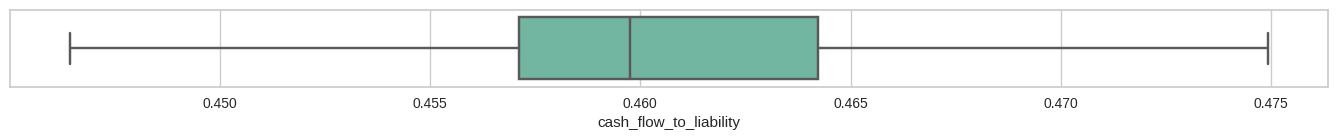

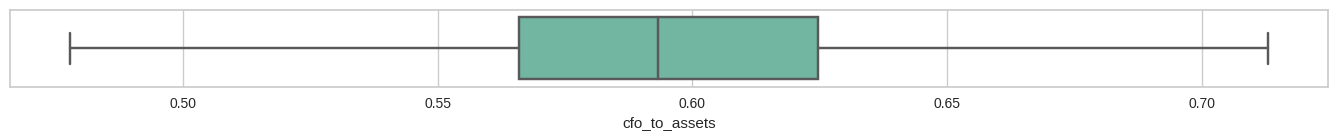

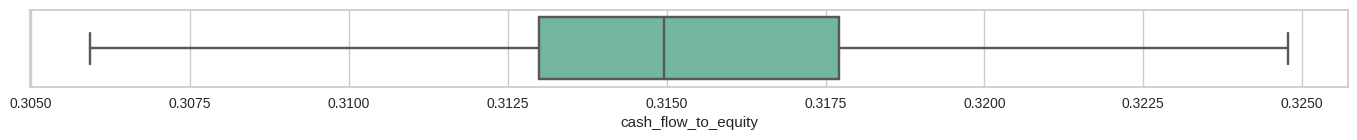

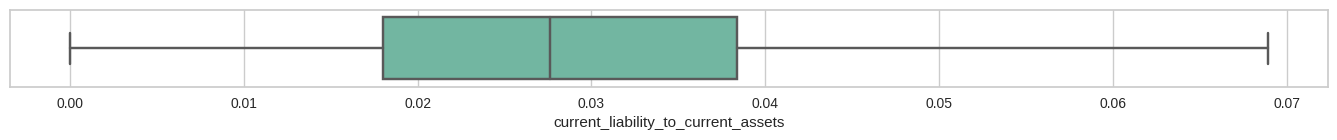

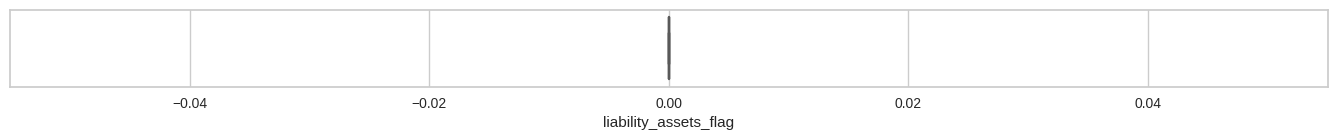

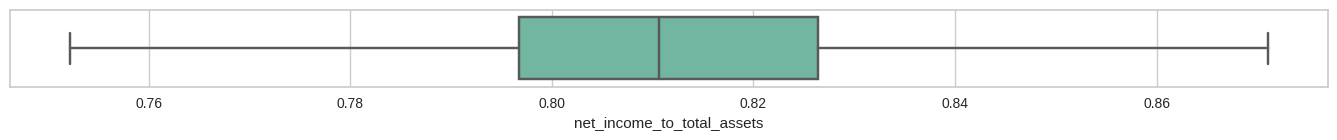

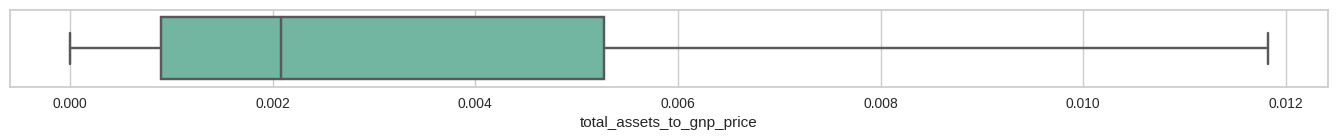

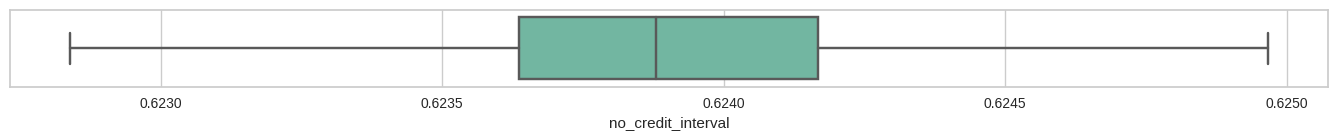

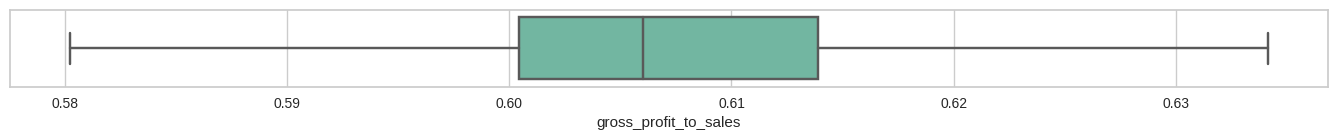

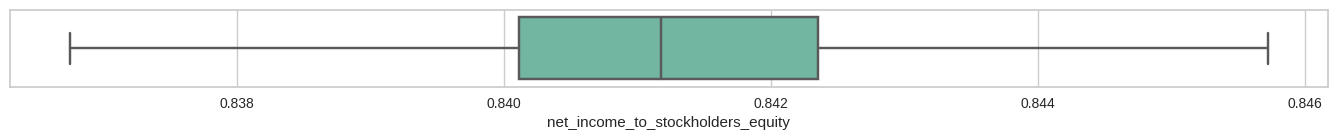

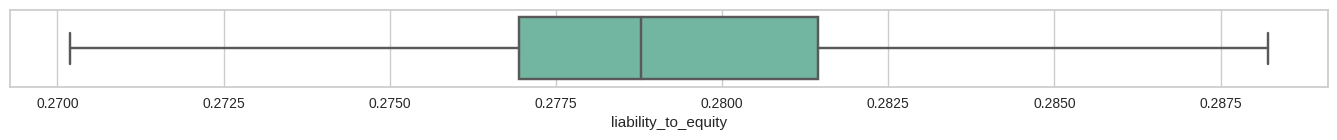

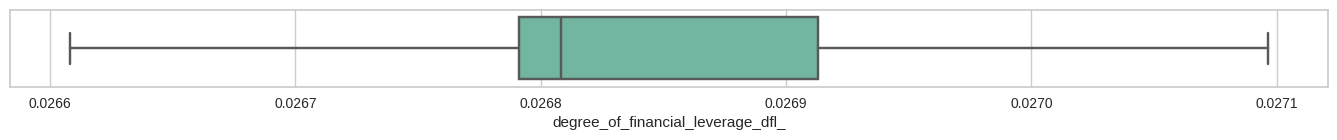

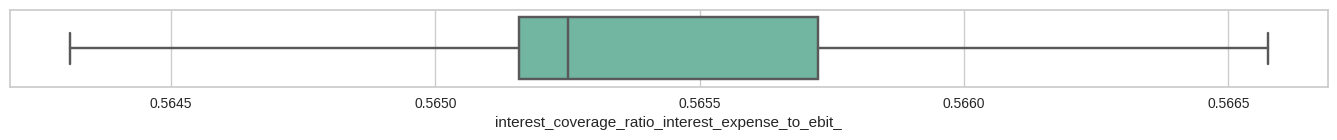

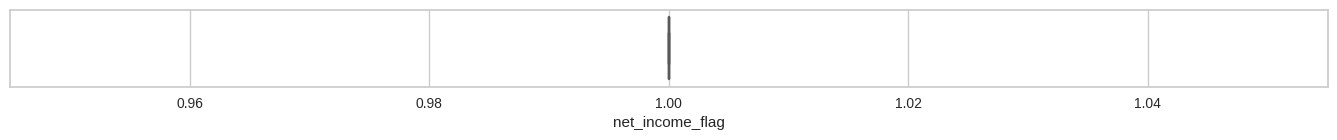

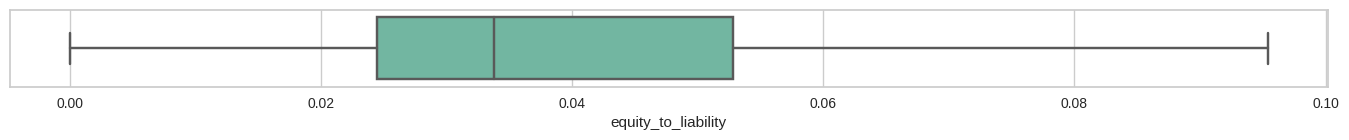

In [ ]:
for column in df.loc[:, df.columns != 'bankrupt_']:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, orient="h", palette="Set2", x=column)

## Exploratory Data Analysis

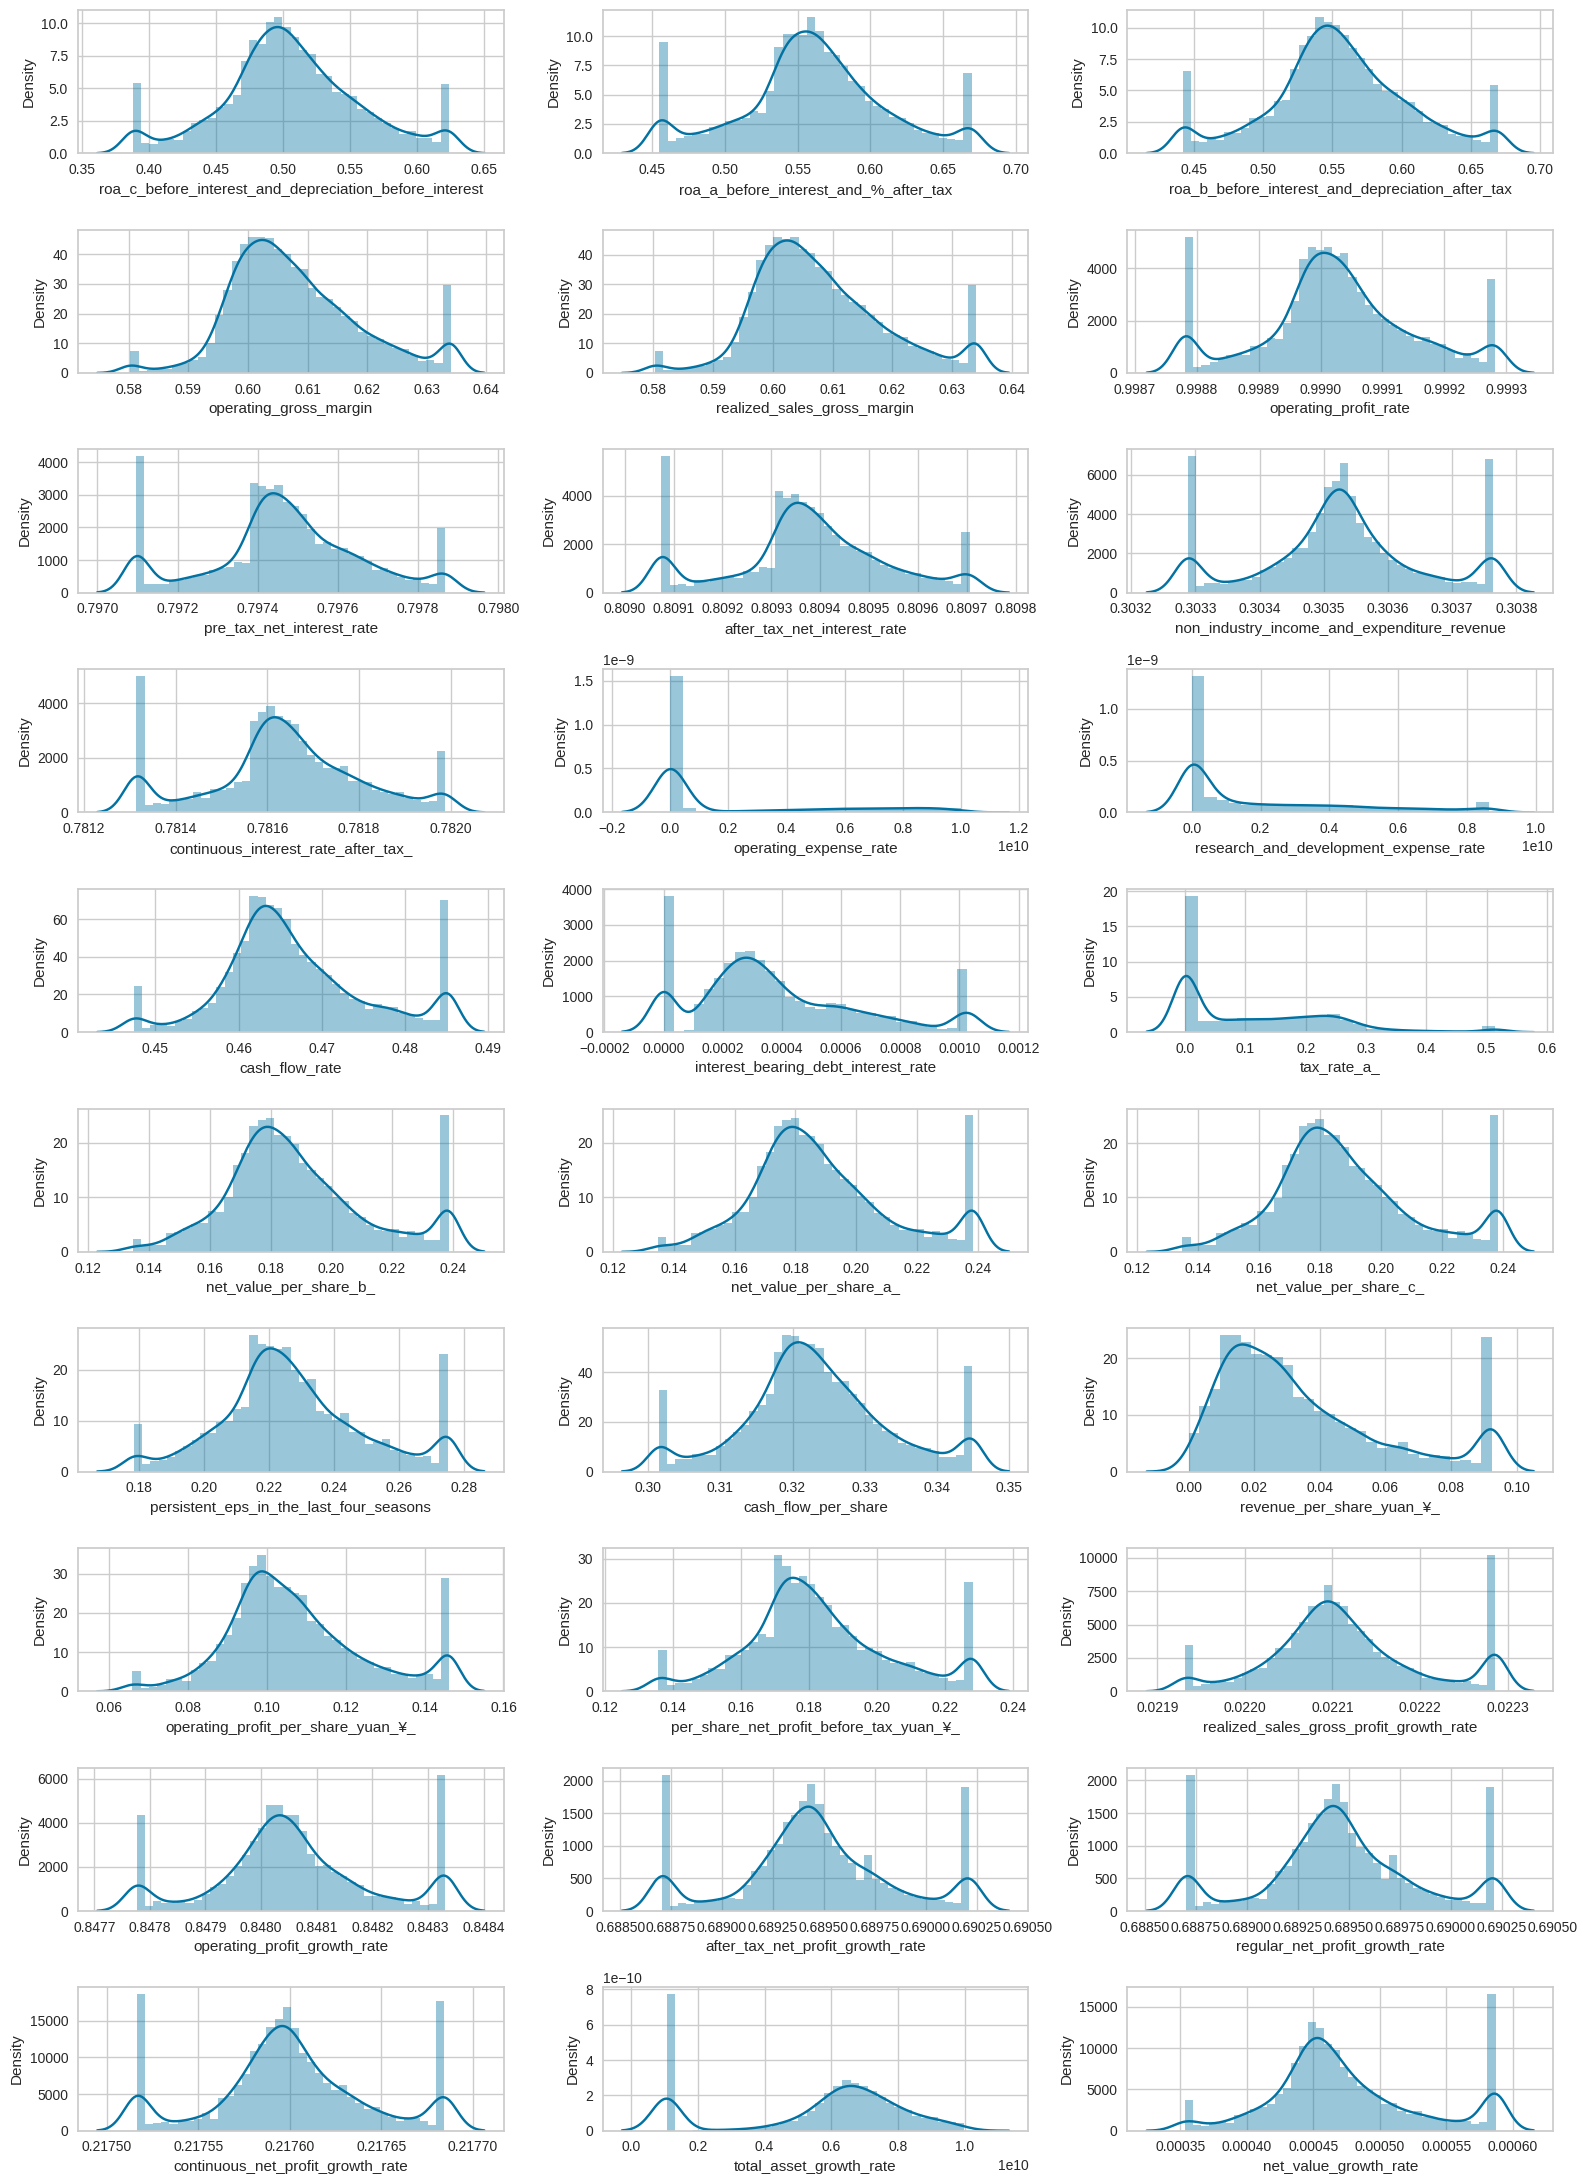

In [ ]:
plt.figure(figsize = (16, 22))
plotnumber = 1

for column in df.loc[:, df.columns != 'bankrupt_']:
    if plotnumber <= 30:
        ax = plt.subplot(10, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

## Features' Distribution (Skewness)

In [ ]:
# Return true/false if skewed
import scipy.stats
skew_df = pd.DataFrame(df.select_dtypes(np.number).columns, columns = ['Feature'])

skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(df[feature]))

skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)  # to obtain magnitude of skew irrelevant of direction
skew_df['Skewed']= skew_df['Absolute Skew'].apply(lambda x: True if x>= 0.5 else False)
with pd.option_context("display.max_rows", 1000):
    display(skew_df)

Feature   Skew  Absolute Skew  \
0                                           bankrupt_  5.294          5.294   
1   roa_c_before_interest_and_depreciation_before_...  0.080          0.080   
2               roa_a_before_interest_and_%_after_tax -0.031          0.031   
3    roa_b_before_interest_and_depreciation_after_tax  0.027          0.027   
4                              operating_gross_margin  0.539          0.539   
5                         realized_sales_gross_margin  0.541          0.541   
6                               operating_profit_rate  0.007          0.007   
7                           pre_tax_net_interest_rate -0.084          0.084   
8                         after_tax_net_interest_rate -0.088          0.088   
9         non_industry_income_and_expenditure_revenue  0.006          0.006   
10                continuous_interest_rate_after_tax_ -0.082          0.082   
11                             operating_expense_rate  1.248          1.248   
12              research_and_development_expense_rate  1.213          1.213   
13                                     cash_flow_rate  0.457          0.457   
14                interest_bearing_debt_interest_rate  0.761          0.761   
15                                        tax_rate_a_  1.009          1.009   
16                             net_value_per_share_b_  0.552          0.552   
17                             net_value_per_share_a_  0.542          0.542   
18                             net_value_per_share_c_  0.540          0.540   
19            persistent_eps_in_the_last_four_seasons  0.326          0.326   
20                                cash_flow_per_share  0.161          0.161   
21                          revenue_per_share_yuan_¥_  1.025          1.025   
22                 operating_profit_per_share_yuan_¥_  0.559          0.559   
23            per_share_net_profit_before_tax_yuan_¥_  0.356          0.356   
24            realized_sales_gross_profit_growth_rate  0.365          0.365   
25                       operating_profit_growth_rate  0.172          0.172   
26                   after_tax_net_profit_growth_rate  0.035          0.035   
27                     regular_net_profit_growth_rate  0.035          0.035   
28                  continuous_net_profit_growth_rate  0.051          0.051   
29                            total_asset_growth_rate -0.783          0.783   
30                              net_value_growth_rate  0.516          0.516   
31               total_asset_return_growth_rate_ratio  0.189          0.189   
32                                cash_reinvestment_% -0.088          0.088   
33                                      current_ratio  0.998          0.998   
34                                        quick_ratio  0.974          0.974   
35                             interest_expense_ratio  0.414          0.414   
36                         total_debt_total_net_worth  0.988          0.988   
37                                       debt_ratio_%  0.246          0.246   
38                                   net_worth_assets -0.246          0.246   
39                long_term_fund_suitability_ratio_a_  1.149          1.149   
40                               borrowing_dependency  1.077          1.077   
41                   contingent_liabilities_net_worth  1.224          1.224   
42                   operating_profit_paid_in_capital  0.561          0.561   
43              net_profit_before_tax_paid_in_capital  0.367          0.367   
44        inventory_and_accounts_receivable_net_value  0.968          0.968   
45                               total_asset_turnover  0.856          0.856   
46                       accounts_receivable_turnover  1.032          1.032   
47                            average_collection_days  0.530          0.530   
48                     inventory_turnover_rate_times_  1.137          1.137   
49                    fixed_assets_turnover_frequency  1.150          1.150   
50               

In [ ]:
query_skew=skew_df.query("Skewed == True")["Feature"]
with pd.option_context("display.max_rows", 1000):
    display(query_skew)

0                                       bankrupt_
4                          operating_gross_margin
5                     realized_sales_gross_margin
11                         operating_expense_rate
12          research_and_development_expense_rate
14            interest_bearing_debt_interest_rate
15                                    tax_rate_a_
16                         net_value_per_share_b_
17                         net_value_per_share_a_
18                         net_value_per_share_c_
21                      revenue_per_share_yuan_¥_
22             operating_profit_per_share_yuan_¥_
29                        total_asset_growth_rate
30                          net_value_growth_rate
33                                  current_ratio
34                                    quick_ratio
36                     total_debt_total_net_worth
39            long_term_fund_suitability_ratio_a_
40                           borrowing_dependency
41               contingent_liabilities_net_worth


## Data Preprocessing

In [ ]:
# Log transform to remove skews

def log_trans(data):
    for col in data:
        skew = data[col].skew()
        if skew>=0.5 or skew<=0.5:
            data[col] = np.log1p(data[col])
        else:
            continue
    return data

df_log = log_trans(df.loc[:, df.columns != 'bankrupt_'])
df_log.head()

roa_c_before_interest_and_depreciation_before_interest  \
0                                              0.328        
1                                              0.381        
2                                              0.355        
3                                              0.336        
4                                              0.382        

   roa_a_before_interest_and_%_after_tax  \
0                                  0.375   
1                                  0.431   
2                                  0.405   
3                                  0.375   
4                                  0.431   

   roa_b_before_interest_and_depreciation_after_tax  operating_gross_margin  \
0                                             0.366                   0.471   
1                                             0.417                   0.476   
2                                             0.387                   0.471   
3                                             0.377                   0.460   
4                                             0.420                   0.469   

   realized_sales_gross_margin  operating_profit_rate  \
0                        0.471                  0.693   
1                        0.476                  0.693   
2                        0.471                  0.693   
3                        0.460                  0.693   
4                        0.469                  0.693   

   pre_tax_net_interest_rate  after_tax_net_interest_rate  \
0                      0.586                        0.593   
1                      0.586                        0.593   
2                      0.586                        0.593   
3                      0.586                        0.593   
4                      0.586                        0.593   

   non_industry_income_and_expenditure_revenue  \
0                                        0.265   
1                                        0.265   
2                                        0.265   
3                                        0.265   
4                                        0.265   

   continuous_interest_rate_after_tax_  ...  net_income_to_total_assets  \
0                                0.577  ...                       0.561   
1                                0.577  ...                       0.585   
2                                0.577  ...                       0.574   
3                                0.577  ...                       0.561   
4                                0.577  ...                       0.585   

   total_assets_to_gnp_price  no_credit_interval  gross_profit_to_sales  \
0                      0.009               0.484                  0.471   
1                      0.008               0.485                  0.476   
2                      0.012               0.485                  0.471   
3                      0.003               0.484                  0.460   
4                      0.004               0.485                  0.469   

   net_income_to_stockholders_equity  liability_to_equity  \
0                              0.608                0.253   
1                              0.610                0.250   
2                              0.608                0.253   
3                              0.608                0.248   
4                              0.610                0.246   

   degree_of_financial_leverage_dfl_  \
0                              0.026   
1                              0.027   
2                              0.026   
3                              0.026   
4                              0.026   

   interest_coverage_ratio_interest_expense_to_ebit_  net_income_flag  \
0                                              0.447            0.693   
1                                              0.449            0.693   
2                                              0.447            0.693   
3                                              0.448            0.693   
4         

### Visualization after Log-Transformation.

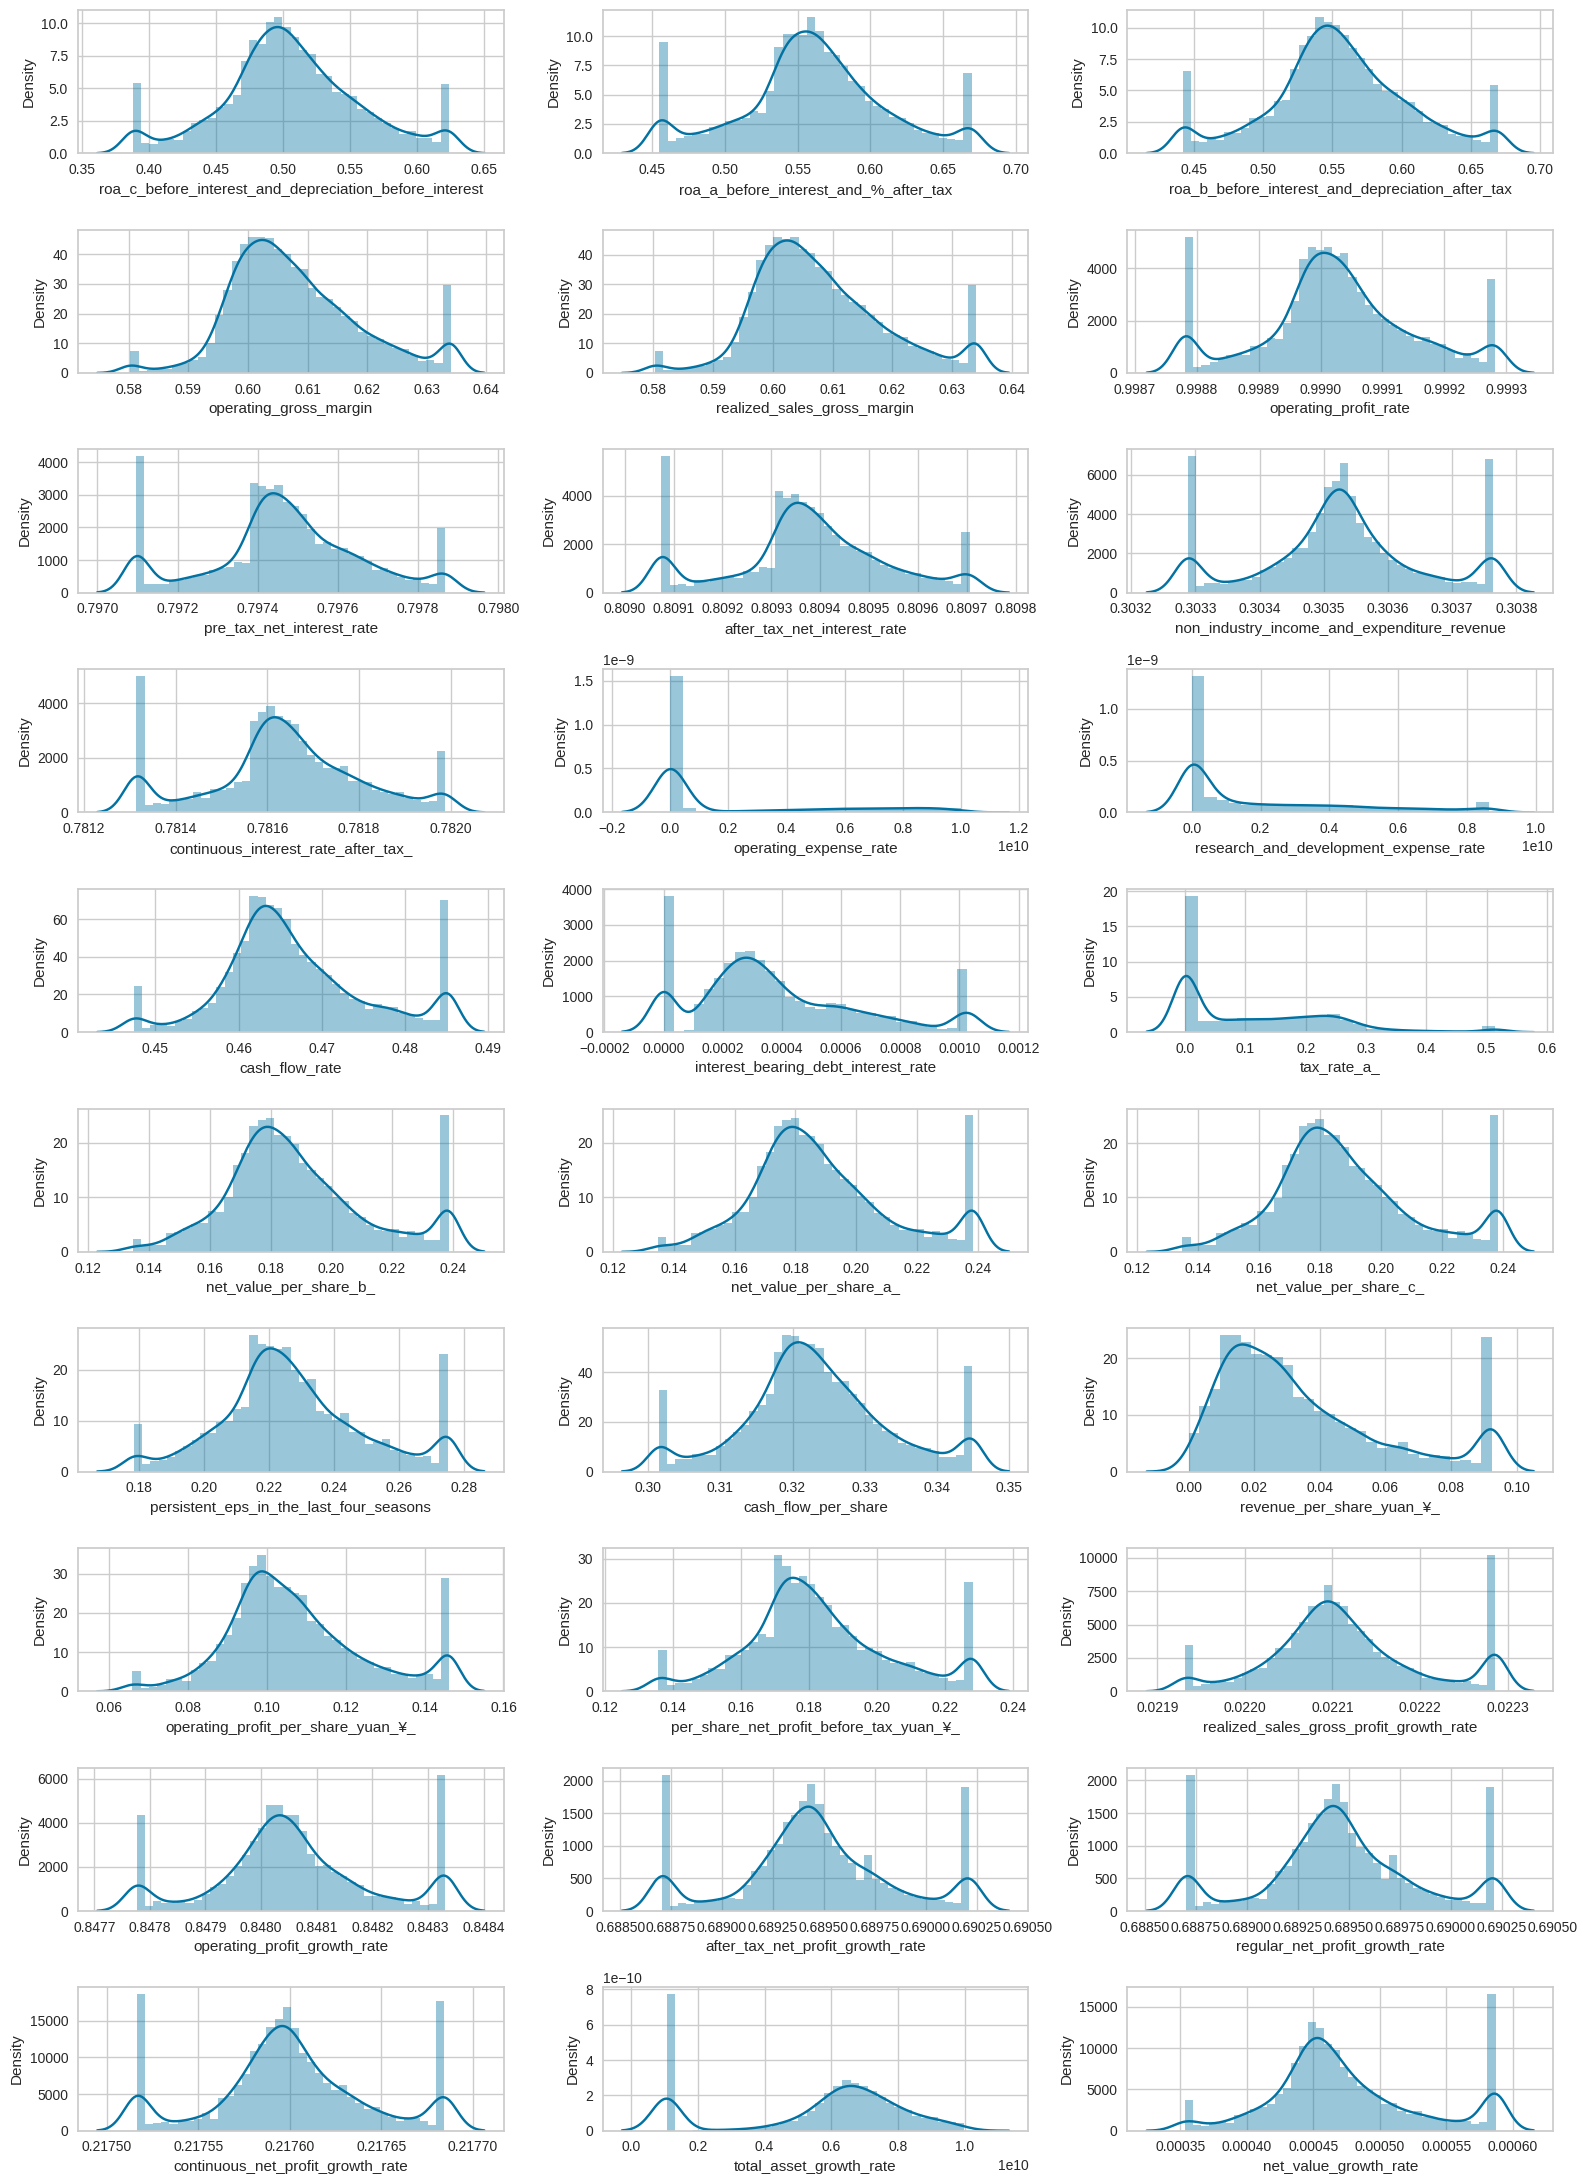

In [ ]:
plt.figure(figsize = (16, 22))
plotnumber = 1

for column in df.loc[:, df.columns != 'bankrupt_']:
    if plotnumber <= 30:
        ax = plt.subplot(10, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
def preprocess_inputs(df):
    df=df.copy()
    #dropping the ' Net Income Flag' column as it is not provided any information
    df=df.drop('net_income_flag',axis=1)
    y=df['bankrupt_']
    x=df.drop('bankrupt_',axis=1)
    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)
    #StandardScaler
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
    return x_train,x_test,y_train,y_test

In [ ]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4773, 94)
(2046, 94)
(4773,)
(2046,)


In [ ]:
df.head()

bankrupt_  roa_c_before_interest_and_depreciation_before_interest  \
0          1                                              0.388        
1          1                                              0.464        
2          1                                              0.426        
3          1                                              0.400        
4          1                                              0.465        

   roa_a_before_interest_and_%_after_tax  \
0                                  0.455   
1                                  0.538   
2                                  0.499   
3                                  0.455   
4                                  0.538   

   roa_b_before_interest_and_depreciation_after_tax  operating_gross_margin  \
0                                             0.442                   0.601   
1                                             0.517                   0.610   
2                                             0.472                   0.601   
3                                             0.458                   0.584   
4                                             0.522                   0.599   

   realized_sales_gross_margin  operating_profit_rate  \
0                        0.601                  0.999   
1                        0.610                  0.999   
2                        0.601                  0.999   
3                        0.584                  0.999   
4                        0.599                  0.999   

   pre_tax_net_interest_rate  after_tax_net_interest_rate  \
0                      0.797                        0.809   
1                      0.797                        0.809   
2                      0.797                        0.809   
3                      0.797                        0.809   
4                      0.797                        0.809   

   non_industry_income_and_expenditure_revenue  ...  \
0                                        0.303  ...   
1                                        0.304  ...   
2                                        0.303  ...   
3                                        0.303  ...   
4                                        0.303  ...   

   net_income_to_total_assets  total_assets_to_gnp_price  no_credit_interval  \
0                       0.752                      0.009               0.623   
1                       0.795                      0.008               0.624   
2                       0.775                      0.012               0.624   
3                       0.752                      0.003               0.623   
4                       0.795                      0.004               0.624   

   gross_profit_to_sales  net_income_to_stockholders_equity  \
0                  0.601                              0.837   
1                  0.610                              0.840   
2                  0.601                              0.837   
3                  0.584                              0.837   
4                  0.599                              0.840   

   liability_to_equity  degree_of_financial_leverage_dfl_  \
0                0.288                              0.027   
1                0.284                              0.027   
2                0.288                              0.027   
3                0.282                              0.027   
4                0.279                              0.027   

   interest_coverage_ratio_interest_expense_to_ebit_  net_income_flag  \
0                                              0.564            1.000   
1                                              0.567            1.000   
2                                              0.564            1.000   
3                                              0.565            1.000   
4                                              0.567            1.000   

   equity_to_liability  
0                0.016  
1                0.021  
2                0.016  
3                0.024 